In [ ]:
cd drive/MyDrive/Adecco_caso

/content/drive/MyDrive/Adecco_caso


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ls

2020_rws.csv  db_2020.csv      preguntas20.gsheet
2021_rws.csv  preguntas20.csv  rws_2020.csv


# 2020

In [ ]:
df = pd.read_csv('2020_rws.csv', encoding='latin-1')

## Renombrar columnas

In [ ]:
def similitud(string1, string2):
    """
    Calcula la cantidad de caracteres idénticos entre dos strings antes de que sean diferentes.
    """
    # Obtiene la longitud del string más corto
    longitud_minima = min(len(string1), len(string2))

    # Encuentra la posición del primer carácter diferente
    for i in range(longitud_minima):
        if string1[i] != string2[i]:
            break
    else:
        # Si los strings son iguales hasta el final del más corto, la cantidad de caracteres idénticos es la longitud mínima
        return longitud_minima

    # La cantidad de caracteres idénticos es la posición del primer carácter diferente
    return i


In [ ]:
columns = df.columns
bloques = []
c = 0
full_sets = set()
for i in columns:
  set_temp = set()
  for j in columns:
    if j in full_sets:
      continue
    if similitud(i, j) > 80:
      set_temp |= {i, j}
      full_sets |={i, j}
      c +=1
  if len(set_temp) > 1:
    bloques.append(set_temp)

In [ ]:
len(bloques)

10

In [ ]:
bloques

In [ ]:
new_names = dict()
for bloque in bloques:
  new_name = input(list(bloque)[0])
  new_names[new_name]=list(bloque)

In [ ]:
new_columns = []
columns_count = []
checked = []
for column in columns:
  for clave, lista in new_names.items():
    if column in lista:
      print(clave+'_'+str(columns_count.count(clave)))
      columns_count.append(clave)
      new_columns.append(clave+str(columns_count.count(clave)))
      checked.append(column)
  if column not in checked:
    new_column = input(column)
    new_columns.append(new_column)
    checked.append(column)



In [ ]:
df_temp = pd.read_csv('preguntas20.csv')

In [ ]:
df_temp

id_name                                           pregunta
0              id                                        Response ID
1       year_born                           What year were you born?
2          gender                               What is your gender?
3        industry  Which of the following best describes your ind...
4      industry_d  Which of the following best describes your ind...
..            ...                                                ...
68  worst_remote4  Compare remote working to working at your empl...
69   best_remote5  Compare remote working to working at your empl...
70  worst_remote5  Compare remote working to working at your empl...
71   best_remote6  Compare remote working to working at your empl...
72  worst_remote6  Compare remote working to working at your empl...

[73 rows x 2 columns]

In [ ]:
new_columns = df_temp['id_name']
columns = df_temp['pregunta']

In [ ]:
df1 = df.rename(columns=dict(zip(columns, new_columns)))

In [ ]:
# Diccionario para obtener los nombres originales de las columnas
preguntas = dict(zip(new_columns, columns))

In [ ]:
relacion = {"id_name": new_columns, "pregunta": columns}


In [ ]:
len(relacion)

2

In [ ]:
df_temp = pd.DataFrame(relacion)
df_temp.to_csv("preguntas20.csv", index=False)

In [ ]:
df_temp

In [ ]:
df1.to_csv("rws_2020.csv", index=False)

## Tiempo remoto en el tiempo

In [ ]:
df1.columns

In [ ]:
import re

def get_num(row):
  patron = r"\d{2,3}%"
  try:
    if "less" in row:
      return -int(re.findall(patron, row)[0].replace("%", ""))
    return int(re.findall(patron, row)[0].replace("%", ""))
  except:
    if row==None:
      return np.nan
    return 0

In [ ]:
df = df1

In [ ]:
df['time_remote_last_year'] = df['time_last_year1'].apply(get_num)
df['time_preferred_remote_last_year'] = df['prefer_last_year'].apply(get_num)
df['time_remote_last_months'] = df['time_last_year2'].apply(get_num)
df['time_preferred_remote_last_months'] = df['prefer_last_months'].apply(get_num)
df['time_preferred_postcovid'] = df['prefer_post_covid'].apply(get_num)
df['productivity'] = df['productive'].apply(get_num)

In [ ]:
means = dict()
for i in range(1, 7):
  name = df.columns[df.columns.get_loc(df.columns[-i])]
  print(name)
  print(df.iloc[:,-i].value_counts(dropna=False))
  print(df.iloc[:,-i].mean())
  means[name] =  df.iloc[:,-i].mean()
# Todo esta en orden

In [ ]:
means

{'productivity': 13.025879230258793,
 'time_preferred_postcovid': 46.715328467153284,
 'time_preferred_remote_last_months': 64.45255474452554,
 'time_remote_last_months': 66.94094226940942,
 'time_preferred_remote_last_year': 43.105507631055076,
 'time_remote_last_year': 30.305242203052423}

## Buscando las categorias de las ocupaciones

In [ ]:
temp = df.groupby('occupation_d')['time_remote_last_months'].mean()
temp = temp.sort_values(ascending=True)


In [ ]:
print(len(temp.index))

41


In [ ]:
import matplotlib.pyplot as plt

def plot_barh(grupo, col):
  temp = df.groupby(grupo)[col].mean()

  temp = temp.sort_values(ascending=True)

  fig, ax = plt.subplots()

  ax.barh(temp.index,
          temp.values, height=1, alpha=0.75)

  plt.subplots_adjust(left=0.2, right=0.9, top=2, bottom=0.1)

  # Configurar etiquetas y título
  plt.xlabel('Grupo')
  plt.ylabel('Promedio de Valor')
  plt.title(col)
  plt.show()


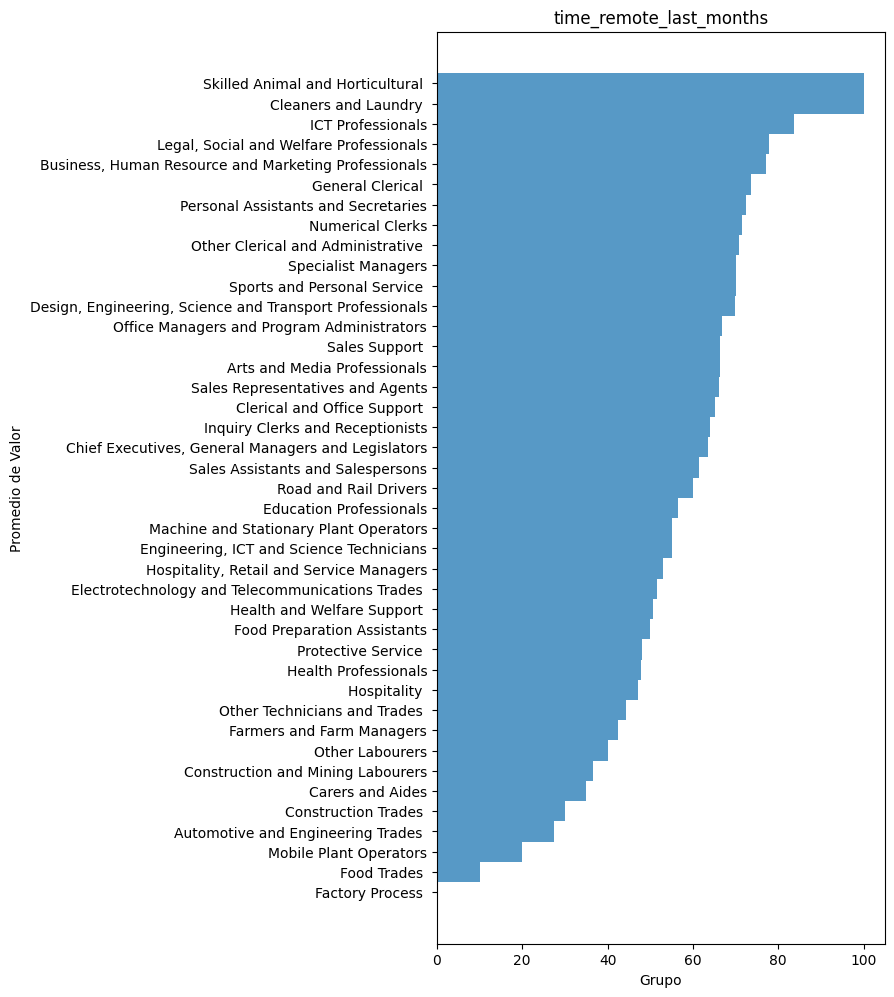

In [ ]:
plot_barh('occupation_d', 'time_remote_last_months')

## Diferencia de preferencia


In [ ]:
df['diff_last_year'] = df['time_remote_last_year'] - df['time_preferred_remote_last_year']
df['diff_last_months'] = df['time_remote_last_months'] - df['time_preferred_remote_last_months']
df['diff_post_covid'] =  df['time_preferred_postcovid'] - df['time_remote_last_months']

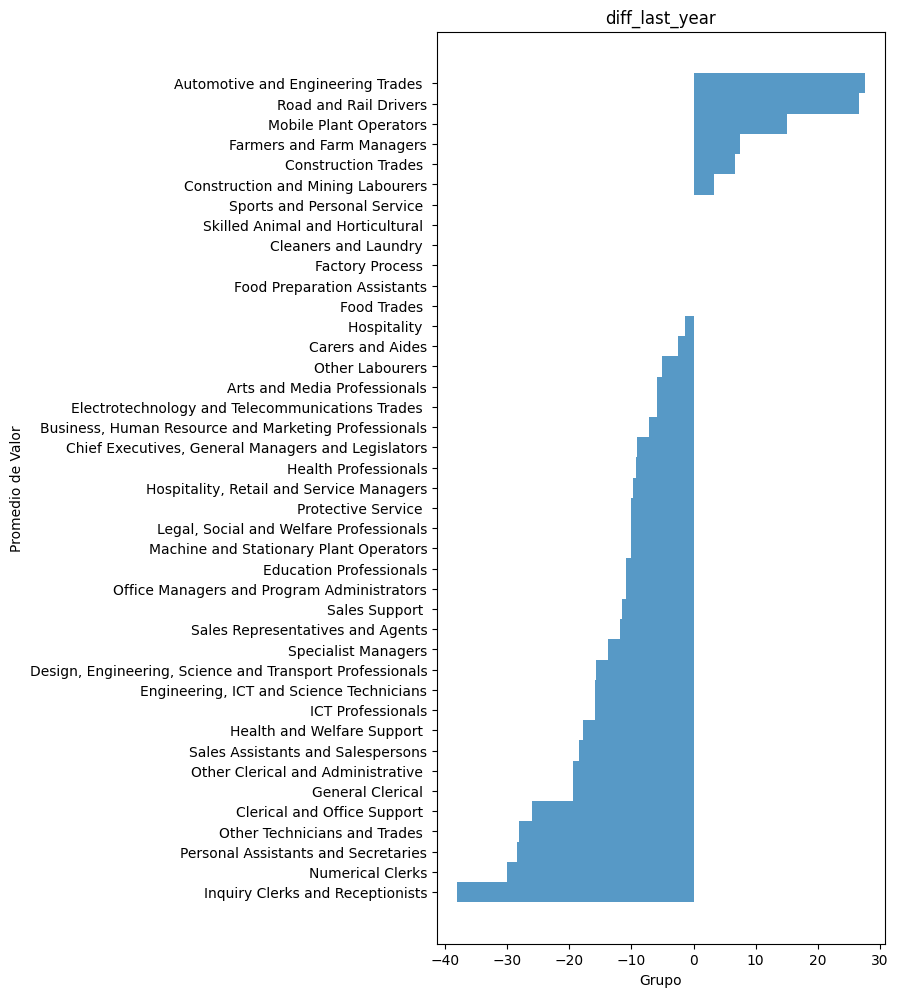

In [ ]:
plot_barh('occupation_d', 'diff_last_year')

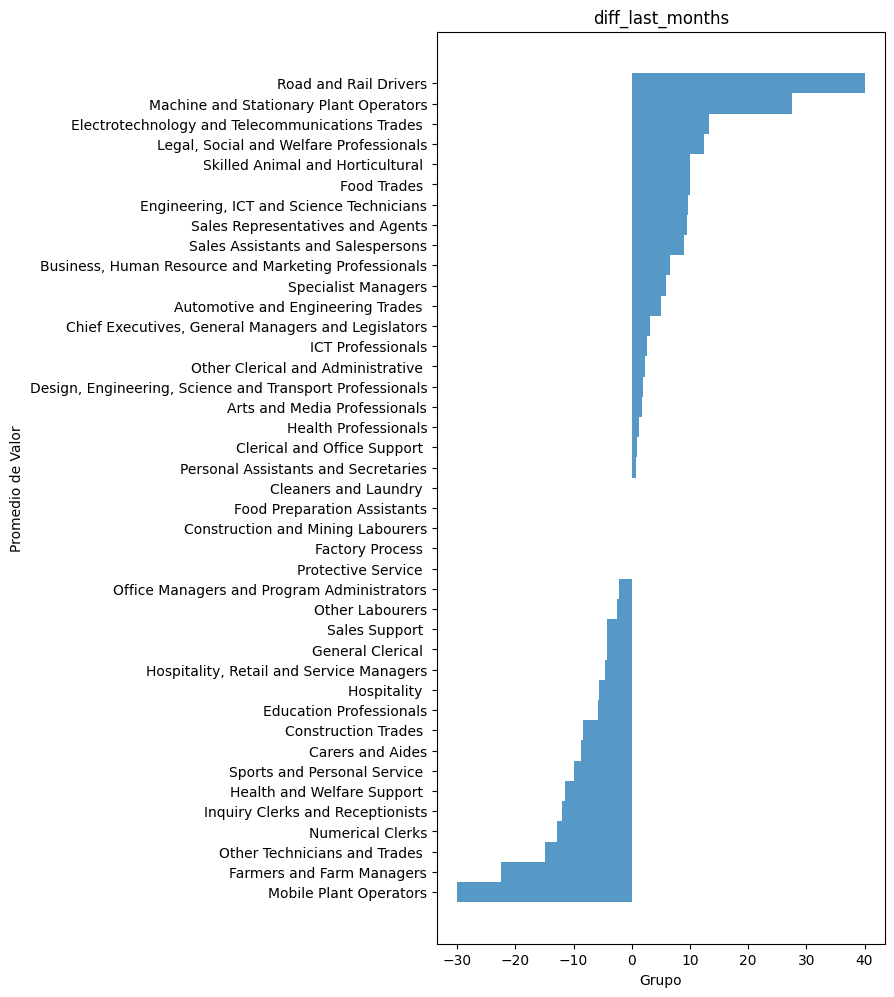

In [ ]:
plot_barh('occupation_d', 'diff_last_months')

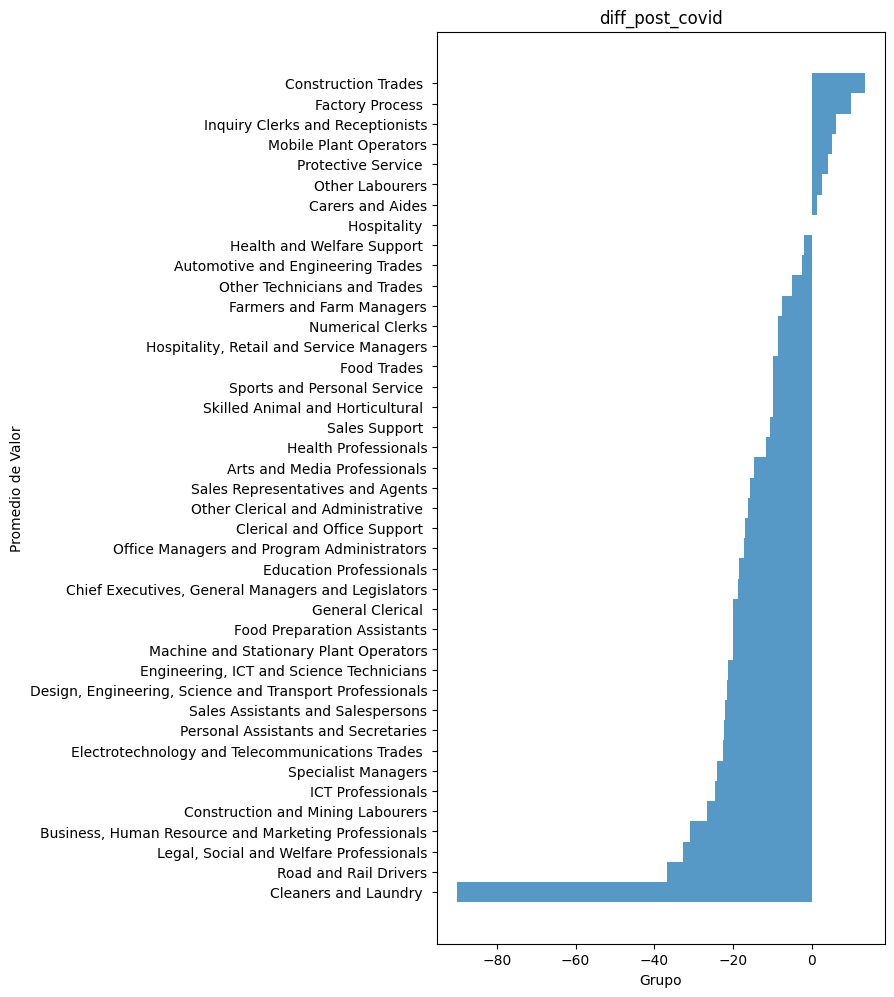

In [ ]:
plot_barh('occupation_d', 'diff_post_covid')

## Thinking Questions

In [ ]:
df['think_last_months2'].value_counts()

Strongly agree                597
Somewhat agree                534
Neither agree nor disagree    198
Somewhat disagree             100
Strongly disagree              47
Name: think_last_months2, dtype: int64

In [ ]:
map_opinions = {'Strongly agree':2,
                'Somewhat agree':1,
                'Neither agree nor disagree':0,
                'Somewhat disagree':-1,
                'Strongly disagree':-2}

In [ ]:
for i in range(1, 7):
  df['tlm_'+str(i)] = df['think_last_months'+str(i)].map(map_opinions)

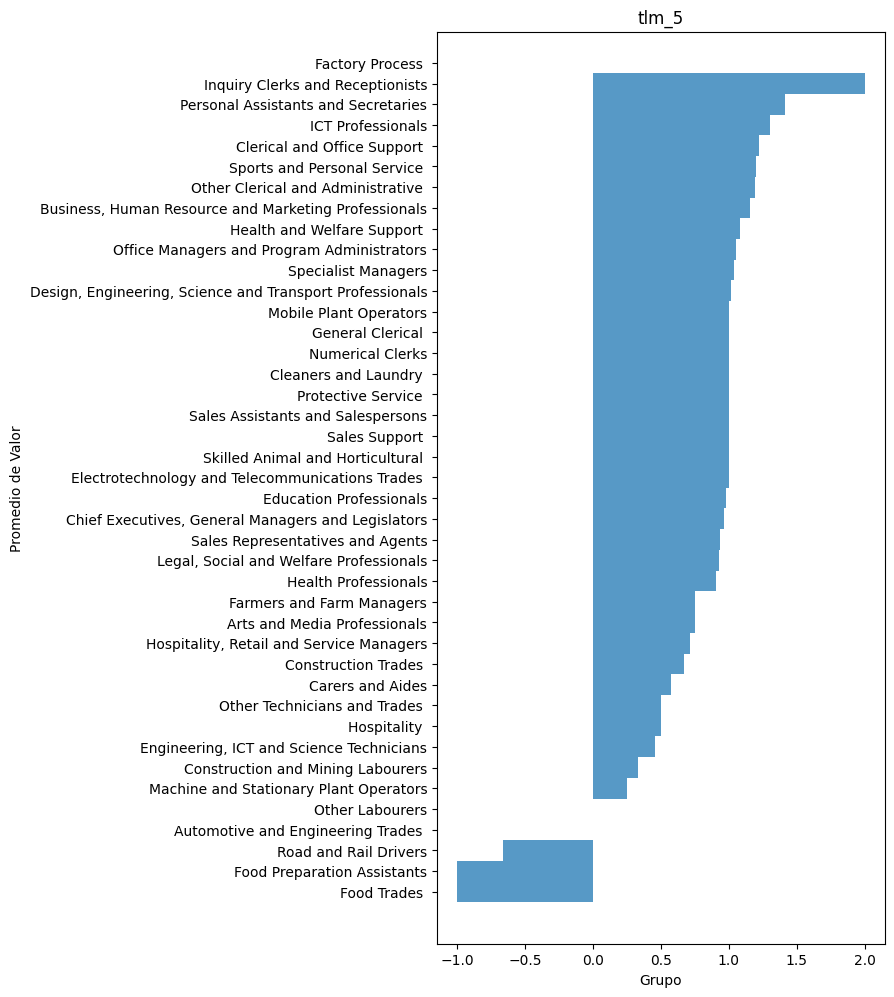

In [ ]:
plot_barh('occupation_d', 'tlm_5')

In [ ]:
for i in range(1, 7):
  df['tly_'+str(i)] = df['think_last_year'+str(i)].map(map_opinions)

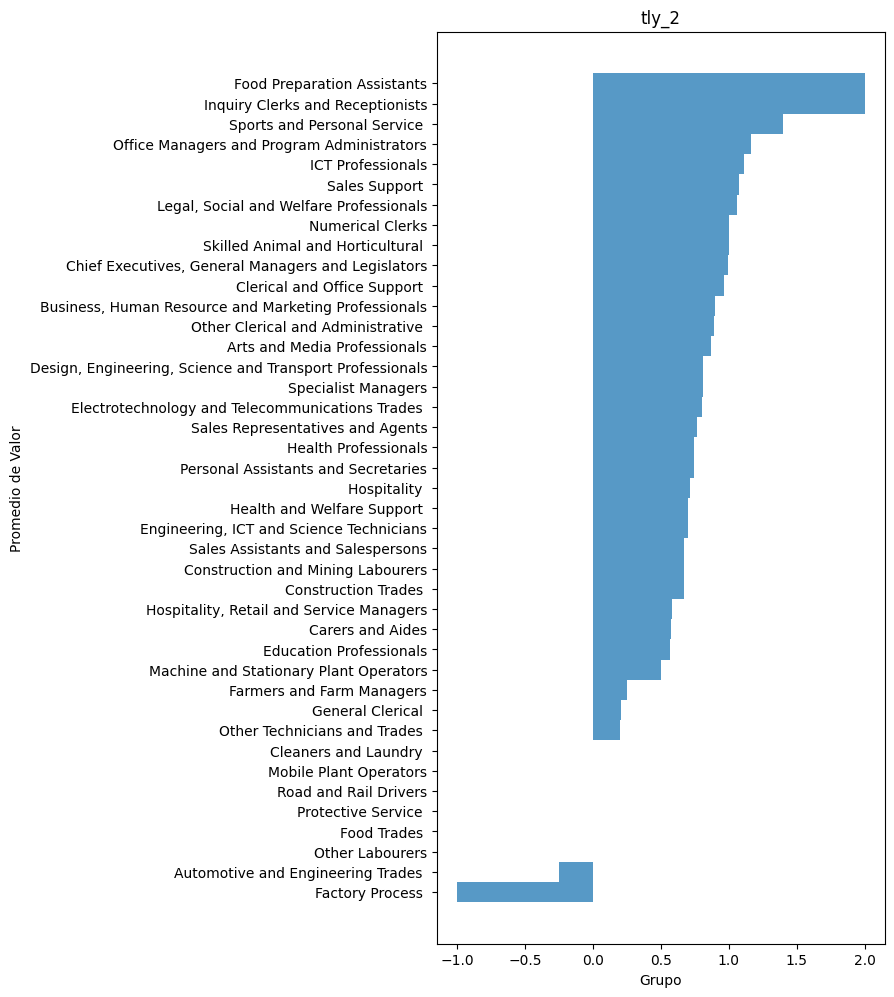

In [ ]:
plot_barh('occupation_d', 'tly_2')

In [ ]:
df['tly_4'].mean()

0.7478122513922036

In [ ]:
for i in range(1, 4):
  df['cur_'+str(i)] = df['cured'+str(i)].map(map_opinions)

In [ ]:
df['cur_1'].mean()

0.40145985401459855

## Time in Workplace and remote

In [ ]:
df['time_workplace1'].mean()

1.7957863304578634

In [ ]:
df['time_remote1'].mean()

0.6686529528865296

## Most and Least Barriers

In [ ]:
barriers = set()
for i in range(1, 11):
  barriers |= set(df['most_barrier'+str(i)].unique())

In [ ]:
len(barriers)

14

In [ ]:
barriers = set()
for i in range(1, 11):
  barriers |= set(df['least_barrier'+str(i)].unique())

In [ ]:
len(barriers)

14

In [ ]:
# Se puede crear una columna con la mayor barrera y otra con la menor barrera por fila
most_barrier = ['least_barrier'+str(i) for i in range(1, 11)]


In [ ]:
from collections import Counter
def get_most(row, columns):
  valores = Counter(df.loc[row, columns].tolist())
  return valores.most_common(1)[0][0]


In [ ]:
most_barrier = ['most_barrier'+str(i) for i in range(1, 11)]
df['most_barrier'] = df.apply(lambda row: get_most(row.name, most_barrier), axis=1)
least_barrier = ['least_barrier'+str(i) for i in range(1, 11)]
df['least_barrier'] = df.apply(lambda row: get_most(row.name, least_barrier), axis=1)

In [ ]:
df[['id','most_barrier', 'least_barrier']].head()

id                            most_barrier  \
0   1       Difficulty collaborating remotely   
1   2  IT equipment (computer, printer, etc.)   
2   3                         Poor management   
3   4                      Lack of motivation   
4   5                         Poor management   

                        least_barrier  
0                      Cyber security  
1    Feeling left out and/or isolated  
2                  Lack of motivation  
3                  Lack of motivation  
4  Connectivity (internet connection)

## Mejor y peor aspecto de trabajar remoto

In [ ]:
aspects = set()
for i in range(1, 7):
  aspects |= set(df['best_remote'+str(i)].unique())

In [ ]:
len(aspects)

12

In [ ]:
best_aspects = ['best_remote'+str(i) for i in range(1, 7)]
df['best_remote'] = df.apply(lambda row: get_most(row.name, best_aspects), axis=1)
worst_aspects = ['worst_remote'+str(i) for i in range(1, 7)]
df['worst_remote'] = df.apply(lambda row: get_most(row.name, worst_aspects), axis=1)

In [ ]:
df[['id','best_remote', 'worst_remote']].head()

id                       best_remote                          worst_remote
0   1  Managing my personal commitments              My working relationships
1   2              My work-life balance  My on-the-job learning opportunities
2   3       The number of hours  I work      Preparing for work and commuting
3   4              My work-life balance  My on-the-job learning opportunities
4   5  Preparing for work and commuting  My on-the-job learning opportunities

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
df.to_csv('db_2020.csv', index=False)

# 2021

## Renombrar columnas

In [ ]:
df = pd.read_csv('2021_rws.csv', encoding='latin-1')

In [ ]:
columns = df.columns
bloques = []
c = 0
full_sets = set()
for i in columns:
  set_temp = set()
  for j in columns:
    if j in full_sets:
      continue
    if similitud(i, j) > 80:
      set_temp |= {i, j}
      full_sets |={i, j}
      c +=1
  if len(set_temp) > 1:
    bloques.append(set_temp)

In [ ]:
len(bloques)

10

In [ ]:
new_names = dict()
for bloque in bloques:
  new_name = input(list(bloque)[0])
  new_names[new_name]=list(bloque)

Thinking about your employers policy on remote working, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - I choose which days I work remotelythink_policy
Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   - My organisation encouraged people to work remotelythink_6months
Imagine that COVID-19 is cured or eradicated.    How likely would you consider the following statements?   - I would have more choice about whether I work remotelycovid_cured
Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities?   For example, a response of 1 means 1 hour.  A response of 0.5 means half an hour.   Your responses should add to 24 hours.   - Sleepthink_workplace
Think about your experience this year. On a day when you work remo

In [ ]:
new_columns = []
columns_count = []
checked = []
for column in columns:
  for clave, lista in new_names.items():
    if column in lista:
      print(clave+'_'+str(columns_count.count(clave)))
      columns_count.append(clave)
      new_columns.append(clave+str(columns_count.count(clave)))
      checked.append(column)
  if column not in checked:
    new_column = input(column)
    new_columns.append(new_column)
    checked.append(column)


In [ ]:
columns = df.columns

In [ ]:
df1 = df.rename(columns=dict(zip(columns, new_columns)))

In [ ]:
relacion = {"id_name": new_columns, "pregunta": columns}
df_temp = pd.DataFrame(relacion)
df_temp.to_csv("preguntas21.csv", index=False)

In [ ]:
df_temp = pd.read_csv('preguntas20.csv')

In [ ]:
df1.to_csv("rws_2021.csv", index=False)

In [ ]:
df = pd.read_csv("rws_2021.csv")

## Porcentajes a numeros

In [ ]:
df = df21

In [ ]:
times = ['productive', 'productive_employees', 'remote_last_quarter','remote_preferred_last_quarter',
         'remote_this_year', 'remote_preferred_this_year',
         'covid_cured_preferred_remote',
         'how_often', 'how_often_like', 'how_often_like', 'policy_workplace_time']

In [ ]:
df[times].head()

In [ ]:
import re
import numpy as np

def get_num21(row):
  patron = r"\d{2,3}%"
  try:
    if "less" in row and "productive" in row:
      return -int(re.findall(patron, row)[0].replace("%", ""))
    return int(re.findall(patron, row)[0].replace("%", ""))
  except:
    if pd.isna(row):
      return np.nan
    return 0

In [ ]:
for column in times:
  df[column+str(1)] = df[column].apply(get_num21)


In [ ]:
times1 = [column + '1' for column in times]

In [ ]:
df[times1]

productive1  productive_employees1  remote_last_quarter1  \
0              50                    NaN                    50   
1              50                    NaN                    10   
2               0                    NaN                   100   
3              50                   50.0                    40   
4              20                    NaN                   100   
...           ...                    ...                   ...   
1507           30                   30.0                    30   
1508            0                    0.0                    10   
1509            0                    NaN                     0   
1510            0                    0.0                    10   
1511           20                    NaN                    20   

      remote_preferred_last_quarter1  remote_this_year1  \
0                                 80                 50   
1                                 50                 10   
2                                100                 90   
3                                 40                 40   
4                                100                100   
...                              ...                ...   
1507                              40                 30   
1508                               0                 10   
1509                             100                  0   
1510                              10                 10   
1511                              20                 20   

      remote_preferred_this_year1  covid_cured_preferred_remote1  how_often1  \
0                              80                             80        50.0   
1                              50                             50        10.0   
2                              90                             60         NaN   
3                              40                             40        40.0   
4                             100                            100         NaN   
...                           ...                            ...         ...   
1507                           30                             30        30.0   
1508                            0                              0         NaN   
1509                           90                             90         NaN   
1510                           10                             10        10.0   
1511                           20                             20        20.0   

      how_often_like1  how_often_like1  policy_workplace_time1  
0                80.0             80.0                    40.0  
1                10.0             10.0                   100.0  
2                 NaN              NaN                    20.0  
3                40.0             40.0                    50.0  
4                 NaN              NaN                     NaN  
...               ...              ...                     ...  
1507             30.0             30.0                    80.0  
1508              NaN              NaN                     NaN  
1509              NaN              NaN                   100.0  
1510             10.0             10.0                     NaN  
1511             20.0             20.0                     NaN  

[1512 rows x 11 columns]

In [ ]:
means = dict()
for column in times1:
  # print(df[column].value_counts(dropna=False))
  # print(df[column].mean())
  means[column] =  df[column].mean()
# Todo esta en orden

In [ ]:
means

{'productive1': 17.367724867724867,
 'productive_employees1': 19.727403156384504,
 'remote_last_quarter1': 55.01322751322751,
 'remote_preferred_last_quarter1': 57.92989417989418,
 'remote_this_year1': 49.689153439153436,
 'remote_preferred_this_year1': 55.55555555555556,
 'covid_cured_preferred_remote1': 52.00396825396825,
 'how_often1': 35.4614549402823,
 'how_often_like1': 40.08686210640608,
 'policy_workplace_time1': 52.3753280839895}

## Plotbar por columna

In [ ]:
plot_barh('gender', 'productive1')

## Diferencia de preferencias

## Think Policy y 6months

En esencia son opiniones. Lo que necesito es traducirlas a numeros porque son categorias ordinales

In [ ]:
df['think_policy1'].value_counts()

Strongly agree                526
Somewhat agree                509
Neither agree nor disagree    277
Somewhat disagree             113
Strongly disagree              87
Name: think_policy1, dtype: int64

In [ ]:
map_opinions = {'Strongly agree':2,
                'Somewhat agree':1,
                'Neither agree nor disagree':0,
                'Somewhat disagree':-1,
                'Strongly disagree':-2,
                'NaN': np.nan}

In [ ]:
thinks = ['think_policy'+str(i) for i in range(1,5)] + ['think_6months'+str(i) for i in range(1,8)]

In [ ]:
df['think_6months1'].unique()

array(['Somewhat agree', 'Neither agree nor disagree', 'Strongly agree',
       'Somewhat disagree', 'Strongly disagree'], dtype=object)

In [ ]:
for think in thinks:
  df[think.replace("think","t")] = df[think].map(map_opinions)

In [ ]:
[t.replace("think", "t") for t in thinks]

['t_policy1',
 't_policy2',
 't_policy3',
 't_policy4',
 't_6months1',
 't_6months2',
 't_6months3',
 't_6months4',
 't_6months5',
 't_6months6',
 't_6months7']

In [ ]:
tthink = [t.replace("think", "t") for t in thinks]
df[tthink].head()


t_policy1  t_policy2  t_policy3  t_policy4  t_6months1  t_6months2  \
0          1          1          1          1           1           1   
1          0          0          0          1           0           0   
2          2          0         -2          0           2           2   
3          1          1          1          1           0           0   
4          2          1          2          1           1           2   

   t_6months3  t_6months4  t_6months5  t_6months6  t_6months7  
0           2           1           1          -1          -1  
1           0           0           0           0           0  
2           2           2           2          -2           2  
3           1           0           0          -1          -1  
4           1           1           2           0           1

## Think workplace y think remote solo necesitan ser numeros

In [ ]:
df['think_workplace1'].dtype

dtype('float64')

## Statementes


Necesito crear la lista con sus nombres raros y despues pasarlos por el mapa

Pero creo que revisare las preguntas con cuidado y seleccionare las que considere mas utiles

In [ ]:
df['statements1'].value_counts()

Somewhat agree                495
Neither agree nor disagree    446
Strongly agree                404
Somewhat disagree             122
Strongly disagree              45
Name: statements1, dtype: int64

In [ ]:
statement_columns = [col for col in df.columns if col.startswith('statement')]


In [ ]:
df[statement_columns].head()

statements1                 statements2  \
0              Strongly agree              Somewhat agree   
1  Neither agree nor disagree  Neither agree nor disagree   
2              Somewhat agree  Neither agree nor disagree   
3              Somewhat agree              Somewhat agree   
4              Strongly agree              Somewhat agree   

                 statements_2                statements_3  \
0  Neither agree nor disagree                         NaN   
1  Neither agree nor disagree                         NaN   
2           Somewhat disagree                         NaN   
3              Somewhat agree  Neither agree nor disagree   
4  Neither agree nor disagree                         NaN   

                 statements11                statements12  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3  Neither agree nor disagree  Neither agree nor disagree   
4                         NaN                         NaN   

                statements1_2                statements21  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3  Neither agree nor disagree  Neither agree nor disagree   
4                         NaN                         NaN   

                 statements22               statements2_2  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3  Neither agree nor disagree  Neither agree nor disagree   
4                         NaN                         NaN   

                statements2_3                statements23  
0                         NaN                         NaN  
1                         NaN                         NaN  
2                         NaN                         NaN  
3  Neither agree nor disagree  Neither agree nor disagree  
4                         NaN                         NaN

In [ ]:
for col in statement_columns:
  df[col.replace("statement","s")] = df[col].map(map_opinions)

In [ ]:
ss = [t.replace("statement", "s") for t in statement_columns]
df[ss].head()

ss1  ss2  ss_2  ss_3  ss11  ss12  ss1_2  ss21  ss22  ss2_2  ss2_3  ss23
0  2.0  1.0   0.0   NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN
1  0.0  0.0   0.0   NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN
2  1.0  0.0  -1.0   NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN
3  1.0  1.0   1.0   0.0   0.0   0.0    0.0   0.0   0.0    0.0    0.0   0.0
4  2.0  1.0   0.0   NaN   NaN   NaN    NaN   NaN   NaN    NaN    NaN   NaN

## Barriers remote

Necesito un nuevo mapa. Parecen respuestas ordinales

In [ ]:
df['barriers_remote5'].value_counts()

Stayed about the same     609
Not a barrier for me      336
Somewhat improved         218
Somewhat worsened         156
Significantly improved    114
Significantly worsened     79
Name: barriers_remote5, dtype: int64

Mientras que las barrier_colleagues necesitan contarse y determinar la mayor barrera que opina cada persona. Solo que debo revisar porque las impares son smallest y la otra biggest

In [ ]:
import numpy as np

In [ ]:
state_map = {'Stayed about the same':0,
             'Not a barrier for me': np.nan,
             'Somewhat improved': 1,
             'Somewhat worsened': -1,
             'Significantly improved': 2,
             'Significantly worsened': -2}

In [ ]:
barriers = [col for col in df.columns if col.startswith('barriers_remo')]


In [ ]:
df[barriers].head()

barriers_remote1       barriers_remote2       barriers_remote3  \
0      Somewhat improved      Somewhat improved  Stayed about the same   
1      Somewhat improved      Somewhat improved      Somewhat improved   
2  Stayed about the same  Stayed about the same  Stayed about the same   
3      Somewhat improved      Somewhat improved      Somewhat improved   
4  Stayed about the same  Stayed about the same  Stayed about the same   

        barriers_remote4       barriers_remote5       barriers_remote6  \
0      Somewhat improved      Somewhat improved      Somewhat improved   
1      Somewhat improved      Somewhat improved      Somewhat improved   
2  Stayed about the same  Stayed about the same  Stayed about the same   
3  Stayed about the same  Stayed about the same  Stayed about the same   
4  Stayed about the same  Stayed about the same      Somewhat worsened   

         barriers_remote7        barriers_remote8       barriers_remote9  \
0       Somewhat improved       Somewhat improved  Stayed about the same   
1       Somewhat improved       Somewhat improved  Stayed about the same   
2   Stayed about the same   Stayed about the same  Stayed about the same   
3  Significantly worsened  Significantly worsened   Not a barrier for me   
4   Stayed about the same   Stayed about the same  Stayed about the same   

        barriers_remote10       barriers_remote11       barriers_remote12  \
0       Somewhat improved   Stayed about the same   Stayed about the same   
1   Stayed about the same   Stayed about the same   Stayed about the same   
2    Not a barrier for me       Somewhat improved       Somewhat improved   
3  Significantly worsened  Significantly worsened  Significantly worsened   
4   Stayed about the same   Stayed about the same   Stayed about the same   

        barriers_remote13       barriers_remote14       barriers_remote15  \
0   Stayed about the same   Stayed about the same       Somewhat improved   
1   Stayed about the same   Stayed about the same   Stayed about the same   
2   Stayed about the same       Somewhat improved       Somewhat improved   
3  Significantly worsened  Significantly worsened  Significantly worsened   
4       Somewhat worsened   Stayed about the same   Stayed about the same   

        barriers_remote16  
0       Somewhat improved  
1   Stayed about the same  
2   Stayed about the same  
3  Significantly worsened  
4   Stayed about the same

In [ ]:
for col in barriers:
  df[col.replace("barriers_remote","bar_rem")] = df[col].map(state_map)

In [ ]:
bar_rem = [t.replace("barriers_remote","bar_rem") for t in barriers]
df[bar_rem].head()

bar_rem1  bar_rem2  bar_rem3  bar_rem4  bar_rem5  bar_rem6  bar_rem7  \
0       1.0       1.0       0.0       1.0       1.0       1.0       1.0   
1       1.0       1.0       1.0       1.0       1.0       1.0       1.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3       1.0       1.0       1.0       0.0       0.0       0.0      -2.0   
4       0.0       0.0       0.0       0.0       0.0      -1.0       0.0   

   bar_rem8  bar_rem9  bar_rem10  bar_rem11  bar_rem12  bar_rem13  bar_rem14  \
0       1.0       0.0        1.0        0.0        0.0        0.0        0.0   
1       1.0       0.0        0.0        0.0        0.0        0.0        0.0   
2       0.0       0.0        NaN        1.0        1.0        0.0        1.0   
3      -2.0       NaN       -2.0       -2.0       -2.0       -2.0       -2.0   
4       0.0       0.0        0.0        0.0        0.0       -1.0        0.0   

   bar_rem15  bar_rem16  
0        1.0        1.0  
1        0.0        0.0  
2        1.0        0.0  
3       -2.0       -2.0  
4        0.0        0.0

## Barrier con colegas

In [ ]:
df['barrier_colleagues7'].value_counts()

Difficulty collaborating with remote colleagues    319
Connectivity/internet issues                       232
Difficulty innovating                              181
Lack of privacy                                    164
Name: barrier_colleagues7, dtype: int64

Como cometi el error de no dividir las biggest de las smallest barriers, debere separarlas ahora tomando en cuenta que las imparesson biggest

In [ ]:
barriers_colle = [col for col in df.columns if col.startswith('barrier_collea')]

In [ ]:
b_barrier_colle = [col for col in barriers_colle if float(col.replace("barrier_colleagues","")) % 2]
s_barrier_colle = [col for col in barriers_colle if not float(col.replace("barrier_colleagues","")) % 2]

In [ ]:
s_barrier_colle

In [ ]:
df['biggest_b_colle'] = df.apply(lambda row: get_most(row.name, b_barrier_colle), axis=1)
df['smallest_b_colle'] = df.apply(lambda row: get_most(row.name, s_barrier_colle), axis=1)

In [ ]:
df[['biggest_b_colle', 'smallest_b_colle']]

biggest_b_colle  \
0                              Noisy work environment   
1                                       Interruptions   
2                                                 NaN   
3                              Noisy work environment   
4                                                 NaN   
...                                               ...   
1507                                              NaN   
1508  Difficulty collaborating with remote colleagues   
1509                                              NaN   
1510  Difficulty collaborating with remote colleagues   
1511                     Connectivity/internet issues   

                                 smallest_b_colle  
0                    Connectivity/internet issues  
1     Lack of appropriate work and meeting spaces  
2                                             NaN  
3                Problems with audio-visual setup  
4                                             NaN  
...                                           ...  
1507                                          NaN  
1508                 Connectivity/internet issues  
1509                                          NaN  
1510                 Connectivity/internet issues  
1511             Problems with audio-visual setup  

[1512 rows x 2 columns]

In [ ]:
df.to_csv("db_2021.csv", index=False)

In [ ]:
df.shape

(1512, 160)

# Graficas

## Carga datos

In [ ]:
cd drive/MyDrive/Adecco_caso/

/content/drive/MyDrive/Adecco_caso


In [ ]:
import pandas as pd
df20 = pd.read_csv("db_2020.csv")
df21 = pd.read_csv("rws_2021.csv")

In [ ]:
list(df21.columns)

In [ ]:
len(df20['occupation_d'].unique())

41

In [ ]:
len(df21['occupation'].unique())

42

## Grupos

In [ ]:
# 2021
think_workplace = [col for col in df.columns if col.startswith('think_workplace')] #hours
think_remote = [col for col in df.columns if col.startswith('think_remote')] #hours
t_policy = [col for col in df.columns if col.startswith('t_policy')] #22
t_months = [col for col in df.columns if col.startswith('t_months')] #22
ss = [col for col in df.columns if col.startswith('ss')] #22
bar_rem = [col for col in df.columns if col.startswith('bar_rem')] #22
#times #%

## Dividir occupation

In [ ]:
df21[['occupation', 'occupation_d']] = df['occupation'].str.split('-', 1, expand=True)


<ipython-input-182-91b06cdb3d3d>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df21[['occupation', 'occupation_d']] = df['occupation'].str.split('-', 1, expand=True)


In [ ]:
df21.to_csv("db_2021.csv", index=False)

## Funciones

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def df_mean(grupo, variables, df):
  cols = [grupo] + variables
  df_temp = df[cols]
  # Crear el nuevo DataFrame agrupando y calculando los promedios
  return df_temp.groupby(grupo).mean()



def head_map(grupo, variables, df):

  # Crear el heatmap

  df_temp = df_mean(grupo, variables, df)
  # Calcular la suma en cada fila
  row_sums = df_temp.sum(axis=1)

  plt.figure(figsize=(8, 12))
  sns.set(font_scale=0.8)  # Ajustar el tamaño de fuente

  # Ordenar las filas según la suma en cada fila
  df_temp = df_temp.loc[row_sums.sort_values(ascending=False).index]


  heatmap = sns.heatmap(df_temp, cmap='coolwarm', annot=False, linewidths=0.5)

  # Mostrar el heatmap
  plt.show()


# Exploración

In [ ]:
cd drive/MyDrive/Adecco_caso/

/content/drive/MyDrive/Adecco_caso


In [ ]:
import pandas as pd
df20 = pd.read_csv("db_2020.csv")
df21 = pd.read_csv("db_2021.csv")

## Exploración 2020

In [ ]:
import numpy as np

### Remote: Cómo se ha trabajado remoto en los meses

1. Last year = 2019
2. Last months = 2020-1
3. Last Quarter = 2020-2
4. This year = 2021
5. Cured = 2021-1

In [ ]:
time_remote_20 = ['time_remote_last_year',	'time_preferred_remote_last_year',
                  'time_remote_last_months',	'time_preferred_remote_last_months',
                  'time_preferred_postcovid']
time_remote_21 = ['remote_last_quarter1',	'remote_preferred_last_quarter1',
                  'remote_this_year1',	'remote_preferred_this_year1',
                  'covid_cured_preferred_remote1']

In [ ]:
means20 = df20[time_remote_20].mean()
means21 = df21[time_remote_21].mean()


In [ ]:
means_real = ['time_remote_last_year', 'time_remote_last_months',
               'remote_last_quarter1', 'remote_this_year1',
              'covid_cured_preferred_remote1']
means_prefer = ['time_preferred_remote_last_year', 'time_preferred_remote_last_months',
               'remote_preferred_last_quarter1', 'remote_preferred_this_year1',
                'covid_cured_preferred_remote1']

In [ ]:
means = pd.concat([means20, means21], ignore_index=False)


In [ ]:
indices = ['2019',  '2020-1', '2020-2', '2021-1', 'Postcovid']
df_tiempos = pd.DataFrame({"Tiempo remoto" :list(means[means_real]),
                           "Tiempo preferido": list(means[means_prefer])}, index=indices)

In [ ]:
df_tiempos

Tiempo remoto  Tiempo preferido
2019           30.305242         43.105508
2020-1         66.940942         64.452555
2020-2         55.013228         57.929894
2021-1         49.689153         55.555556
Postcovid      52.003968         52.003968

Intento de nueva tabla

In [ ]:
promedios = df20[time_remote_20+['occupation']].groupby('occupation').mean()


In [ ]:
['time_remote_last_year',	'time_preferred_remote_last_year',
                  'time_remote_last_months',	'time_preferred_remote_last_months',
                  'time_preferred_postcovid']

In [ ]:
set(df21['occupation_d'].unique())- set(df20['occupation_d'].unique())

{'Farm, Forestry and Garden ', 'Storepersons'}

In [ ]:
df_tiempos.to_csv("tiempos_remote.csv")

## Occupation: Distribución y tiempo impuesto

In [ ]:
df21['occupation_d']

0                                       ICT Professionals
1                                       ICT Professionals
2       Business, Human Resource and Marketing Profess...
3                                    Health Professionals
4                                     Specialist Managers
                              ...                        
1507    Chief Executives, General Managers and Legisla...
1508                                 Health Professionals
1509                         Clerical and Office Support 
1510    Chief Executives, General Managers and Legisla...
1511           Office Managers and Program Administrators
Name: occupation_d, Length: 1512, dtype: object

In [ ]:
df21['occupation_d'] = df21['occupation_d'].str.strip().replace("Workers", "", regex=True)

In [ ]:
df21['occupation_d'] = df21['occupation_d'].str.lstrip()

In [ ]:
test

In [ ]:
df_oc = pd.merge(df_mean('occupation_d', time_remote_20, df20).reset_index(),
                 df_mean('occupation_d', time_remote_21, df21).reset_index(),
                 on='occupation_d')

Configuramos en ambas tablas para que sean igual las occupations

In [ ]:
new_names = {'time_remote_last_year':'2019', 'time_remote_last_months':'2020-1',
               'remote_last_quarter1':'2020-2', 'remote_this_year1':'2021-1',
              'covid_cured_preferred_remote1': '2021-2p',
             'time_preferred_remote_last_year':'2019p', 'time_preferred_remote_last_months':'2020-1p',
               'remote_preferred_last_quarter1': '2020-2p', 'remote_preferred_this_year1':'2021-1'}

In [ ]:
df_oc = df_oc.rename(columns=new_names)

In [ ]:
df_oc = df_oc.drop('time_preferred_postcovid', axis=1)

## Traducir ocupaciones

In [ ]:
df21['occupation_d'] = df21['occupation_d'].str.strip()
df20['occupation_d'] = df20['occupation_d'].str.strip()

In [ ]:
set(df21['occupation_d'].unique()) -set(df20['occupation_d'].unique())

{'Farm, Forestry and Garden', 'Storepersons'}

In [ ]:
occ_ES = {
    'ICT Professionals': 'Profesionales de Tecnologías de la Información y Comunicación',
    'Business, Human Resource and Marketing Professionals': 'Profesionales de Negocios, Recursos Humanos y Marketing',
    'Health Professionals': 'Profesionales de la Salud',
    'Specialist Managers': 'Gerentes Especialistas',
    'Construction Trades': 'Oficios de Construcción',
    'General Clerical': 'Clerical General',
    'Mobile Plant Operators': 'Operadores de Equipos Móviles',
    'Education Professionals': 'Profesionales de la Educación',
    'Hospitality, Retail and Service Managers': 'Gerentes de Hospitalidad, Retail y Servicios',
    'Chief Executives, General Managers and Legislators': 'Directores Ejecutivos, Gerentes Generales y Legisladores',
    'Sales Support': 'Soporte de Ventas',
    'Hospitality': 'Hospitalidad',
    'Clerical and Office Support': 'Apoyo Clerical y de Oficina',
    'Skilled Animal and Horticultural': 'Habilidad en Cuidado Animal y Horticultura',
    'Design, Engineering, Science and Transport Professionals': 'Profesionales de Diseño, Ingeniería, Ciencia y Transporte',
    'Legal, Social and Welfare Professionals': 'Profesionales Legales, Sociales y de Bienestar',
    'Office Managers and Program Administrators': 'Gerentes de Oficina y Administradores de Programas',
    'Arts and Media Professionals': 'Profesionales de las Artes y los Medios',
    'Electrotechnology and Telecommunications Trades': 'Oficios de Electrotecnología y Telecomunicaciones',
    'Personal Assistants and Secretaries': 'Asistentes Personales y Secretarias',
    'Health and Welfare Support': 'Apoyo de Salud y Bienestar',
    'Farmers and Farm Managers': 'Agricultores y Gerentes de Granjas',
    'Sales Assistants and Salespersons': 'Asistentes y Vendedores',
    'Other Clerical and Administrative': 'Otros Clericales y Administrativos',
    'Storepersons': 'Encargados de Almacén',
    'Sales Representatives and Agents': 'Representantes y Agentes de Ventas',
    'Food Trades': 'Oficios de Alimentación',
    'Inquiry Clerks and Receptionists': 'Clerks de Consultas y Recepcionistas',
    'Construction and Mining Labourers': 'Obreros de Construcción y Minería',
    'Engineering, ICT and Science Technicians': 'Técnicos de Ingeniería, Tecnologías de la Información y Ciencia',
    'Protective Service': 'Servicio de Protección',
    'Other Technicians and Trades': 'Otros Técnicos y Oficios',
    'Numerical Clerks': 'Clerks Numéricos',
    'Other Labourers': 'Otros Obreros',
    'Machine and Stationary Plant Operators': 'Operadores de Máquinas y Plantas Estacionarias',
    'Road and Rail Drivers': 'Conductores de Carretera y Ferrocarril',
    'Farm, Forestry and Garden': 'Granja, Silvicultura y Jardín',
    'Factory Process': 'Proceso de Fábrica',
    'Carers and Aides': 'Cuidadores y Asistentes',
    'Automotive and Engineering Trades': 'Oficios de Automoción e Ingeniería',
    'Food Preparation Assistants': 'Asistentes de Preparación de Alimentos',
    'Cleaners and Laundry': 'Limpiadores y Lavandería'
}


In [ ]:
df20['occupation_d'] = df20['occupation_d'].map(occ_ES)
df21['occupation_d'] = df21['occupation_d'].map(occ_ES)

In [ ]:
df20.to_csv("db_2020.csv", index=False)
df21.to_csv("db_2021.csv", index=False)

### Detalles

In [ ]:
dft20 = pd.read_csv("occ_think20_ES.csv")

In [ ]:
dft20['occupation_d'] = dft20['occupation_d'].map(occ_ES)

In [ ]:
dft20.to_csv("occ_think20_ES.csv", index=False)

In [ ]:
dft20['occupation_d'].value_counts(dropna=False)

Gerentes Especialistas                                             262
NaN                                                                223
Directores Ejecutivos, Gerentes Generales y Legisladores           193
Profesionales de Negocios, Recursos Humanos y Marketing            148
Profesionales de Tecnologías de la Información y Comunicación      119
Profesionales de Diseño, Ingeniería, Ciencia y Transporte          105
Profesionales de la Educación                                       88
Representantes y Agentes de Ventas                                  45
Gerentes de Hospitalidad, Retail y Servicios                        44
Profesionales de la Salud                                           43
Profesionales Legales, Sociales y de Bienestar                      41
Asistentes Personales y Secretarias                                 38
Gerentes de Oficina y Administradores de Programas                  37
Profesionales de las Artes y los Medios                             36
Técnic

## Nuevo intento

In [ ]:
import pandas as pd
agg_dict = {'time_preferred_remote_last_year': 'mean', 'time_preferred_remote_last_months': 'mean'}

# Calcular los promedios agrupando por la columna 'Grupo'
promedios = df20.groupby('occupation_d').agg(agg_dict)

# Crear el nuevo dataframe con las filas deseadas
prefer_df = pd.DataFrame(columns=['Ocupaciones1', 'Fecha1', 'Preferencia'])

for grupo, promedio in promedios.iterrows():
    for columna, valor in promedio.iteritems():
        prefer_df = prefer_df.append({'Ocupaciones1': grupo, 'Fecha1': columna, 'Preferencia': valor}, ignore_index=True)


In [ ]:
agg_dict = {'time_remote_last_year': 'mean', 'time_remote_last_months': 'mean'}

# Calcular los promedios agrupando por la columna 'Grupo'
promedios = df20.groupby('occupation_d').agg(agg_dict)

# Crear el nuevo dataframe con las filas deseadas
remote_df = pd.DataFrame(columns=['Ocupaciones', 'Fecha', 'Remoto'])

for grupo, promedio in promedios.iterrows():
    for columna, valor in promedio.iteritems():
        remote_df = remote_df.append({'Ocupaciones': grupo, 'Fecha': columna, 'Remoto': valor}, ignore_index=True)


In [ ]:
df_remote = pd.concat([remote_df, prefer_df], axis=1)

In [ ]:
df_remote.head()

Ocupaciones                    Fecha     Remoto  \
0  Agricultores y Gerentes de Granjas    time_remote_last_year  47.500000   
1  Agricultores y Gerentes de Granjas  time_remote_last_months  42.500000   
2         Apoyo Clerical y de Oficina    time_remote_last_year  20.000000   
3         Apoyo Clerical y de Oficina  time_remote_last_months  65.192308   
4          Apoyo de Salud y Bienestar    time_remote_last_year  30.000000   

                         Ocupaciones1                             Fecha1  \
0  Agricultores y Gerentes de Granjas    time_preferred_remote_last_year   
1  Agricultores y Gerentes de Granjas  time_preferred_remote_last_months   
2         Apoyo Clerical y de Oficina    time_preferred_remote_last_year   
3         Apoyo Clerical y de Oficina  time_preferred_remote_last_months   
4          Apoyo de Salud y Bienestar    time_preferred_remote_last_year   

   Preferencia  
0    40.000000  
1    65.000000  
2    45.961538  
3    64.230769  
4    47.857143

In [ ]:
import pandas as pd
agg_dict = {'remote_preferred_last_quarter1': 'mean', 'remote_preferred_this_year1': 'mean'}

# Calcular los promedios agrupando por la columna 'Grupo'
promedios = df21.groupby('occupation_d').agg(agg_dict)

# Crear el nuevo dataframe con las filas deseadas
prefer_df1 = pd.DataFrame(columns=['Ocupaciones1', 'Fecha1', 'Preferencia'])

for grupo, promedio in promedios.iterrows():
    for columna, valor in promedio.iteritems():
        prefer_df1 = prefer_df1.append({'Ocupaciones1': grupo, 'Fecha1': columna, 'Preferencia': valor}, ignore_index=True)


In [ ]:
agg_dict = {'remote_this_year1': 'mean', 'remote_last_quarter1': 'mean'}

# Calcular los promedios agrupando por la columna 'Grupo'
promedios = df21.groupby('occupation_d').agg(agg_dict)

# Crear el nuevo dataframe con las filas deseadas
remote_df1 = pd.DataFrame(columns=['Ocupaciones', 'Fecha', 'Remoto'])

for grupo, promedio in promedios.iterrows():
    for columna, valor in promedio.iteritems():
        remote_df1 = remote_df1.append({'Ocupaciones': grupo, 'Fecha': columna, 'Remoto': valor}, ignore_index=True)


In [ ]:
df_remote1 = pd.concat([remote_df1, prefer_df1], axis=1)

In [ ]:
df_remote_full = pd.concat([df_remote, df_remote1], axis=0)

In [ ]:
df_remote_full = df_remote_full.drop('Ocupaciones1', axis=1)

In [ ]:
df_remote_full = df_remote_full.drop('Fecha1', axis=1)

In [ ]:
df_sorted = df_remote_full.sort_values(['Ocupaciones', 'Fecha'])


In [ ]:
df_remote_full

Ocupaciones  \
0                  Agricultores y Gerentes de Granjas   
1                  Agricultores y Gerentes de Granjas   
2                         Apoyo Clerical y de Oficina   
3                         Apoyo Clerical y de Oficina   
4                          Apoyo de Salud y Bienestar   
..                                                ...   
79                             Servicio de Protección   
80                                  Soporte de Ventas   
81                                  Soporte de Ventas   
82  Técnicos de Ingeniería, Tecnologías de la Info...   
83  Técnicos de Ingeniería, Tecnologías de la Info...   

                      Fecha     Remoto  Preferencia  
0     time_remote_last_year  47.500000    40.000000  
1   time_remote_last_months  42.500000    65.000000  
2     time_remote_last_year  20.000000    45.961538  
3   time_remote_last_months  65.192308    64.230769  
4     time_remote_last_year  30.000000    47.857143  
..                      ...        ...          ...  
79     remote_last_quarter1  18.750000    28.750000  
80        remote_this_year1  53.333333    58.000000  
81     remote_last_quarter1  47.333333    54.666667  
82        remote_this_year1  47.777778    62.777778  
83     remote_last_quarter1  55.555556    56.111111  

[164 rows x 4 columns]

In [ ]:
df_sorted.head()

Ocupaciones                    Fecha     Remoto  \
1  Agricultores y Gerentes de Granjas     remote_last_quarter1  38.571429   
0  Agricultores y Gerentes de Granjas        remote_this_year1  45.000000   
1  Agricultores y Gerentes de Granjas  time_remote_last_months  42.500000   
0  Agricultores y Gerentes de Granjas    time_remote_last_year  47.500000   
3         Apoyo Clerical y de Oficina     remote_last_quarter1  65.319149   

   Preferencia  
1    43.571429  
0    42.857143  
1    65.000000  
0    40.000000  
3    67.446809

In [ ]:
map_fecha = {'time_remote_last_year': '01-12-2019',
              'time_remote_last_months': '01-06-2020',
             'remote_last_quarter1': '01-12-2020',
             'remote_this_year1': '01-06-2021'}

In [ ]:
df_sorted['Fecha'] = df_sorted['Fecha'].map(map_fecha)

df_sorted['Fecha'] = pd.to_datetime(df_sorted['Fecha'], format='%d-%m-%Y')


In [ ]:
df_sorted = df_sorted.sort_values(['Ocupaciones', 'Fecha'])


In [ ]:
df_sorted

Ocupaciones      Fecha     Remoto  \
0                  Agricultores y Gerentes de Granjas 2019-12-01  47.500000   
1                  Agricultores y Gerentes de Granjas 2020-06-01  42.500000   
1                  Agricultores y Gerentes de Granjas 2020-12-01  38.571429   
0                  Agricultores y Gerentes de Granjas 2021-06-01  45.000000   
2                         Apoyo Clerical y de Oficina 2019-12-01  20.000000   
..                                                ...        ...        ...   
80                                  Soporte de Ventas 2021-06-01  53.333333   
78  Técnicos de Ingeniería, Tecnologías de la Info... 2019-12-01  20.833333   
79  Técnicos de Ingeniería, Tecnologías de la Info... 2020-06-01  55.000000   
83  Técnicos de Ingeniería, Tecnologías de la Info... 2020-12-01  55.555556   
82  Técnicos de Ingeniería, Tecnologías de la Info... 2021-06-01  47.777778   

    Preferencia  
0     40.000000  
1     65.000000  
1     43.571429  
0     42.857143  
2     45.961538  
..          ...  
80    58.000000  
78    36.666667  
79    45.416667  
83    56.111111  
82    62.777778  

[164 rows x 4 columns]

In [ ]:
df_sorted.to_csv("remote_times_ES.csv", index=False)

## Indice de diferencia entre preferido y realidad

In [ ]:
df20['index_p20'] = ((df20['time_preferred_remote_last_year'] - df20['time_remote_last_year']) +
                   (df20['time_preferred_remote_last_months'] - df20['time_remote_last_months']))/2
df21['index_p21'] = ((df21['remote_preferred_this_year1'] - df21['remote_this_year1']) +
                   (df21['remote_preferred_last_quarter1'] - df21['remote_last_quarter1']))/2

In [ ]:
df_p = pd.merge(df_mean('occupation_d', ['index_p20'], df20).reset_index(),
                 df_mean('occupation_d', ['index_p21'], df21).reset_index(),
                 on='occupation_d')

In [ ]:
df_oc = pd.merge(df_oc,
                 df_p,
                 on='occupation_d')

In [ ]:
df_oc.to_csv("occupation_vs_remote.csv", index=False)

## household

In [ ]:
df_mean('household', ['index_p20'], df20)

index_p20
household                                            
Couple with dependent children               3.696429
Couple with no dependent children            5.050000
Group household                              5.526316
Multiple family household                    6.481481
One  parent family with dependent children  10.403226
Other one family household                  13.857143
Single person                                5.845865

In [ ]:
df_mean('household', ['index_p21'], df21)

index_p21
household                                           
Couple with dependent children              3.539427
Couple with no dependent children           3.564593
Group household                             5.821918
Multiple family household                   1.481481
One parent family with dependent children   4.809524
Other one family household                  8.921569
Single person                               6.758893

## organisation

In [ ]:
df_mean('organisation_size', ['index_p20'], df20)

index_p20
organisation_size                
Between 1 and 4          6.318681
Between 20 and 199       5.526316
Between 5 and 19         2.414530
I am the only employee   2.380952
More than 200            5.926928

In [ ]:
df_mean('organisation', ['index_p21'], df21)

index_p21
organisation                                
Between 1 and 4                     1.481481
Between 20 and 199                  6.966292
Between 5 and 19                    7.065217
I am a sole trader/owner-operator   0.200000
More than 200                       2.805851

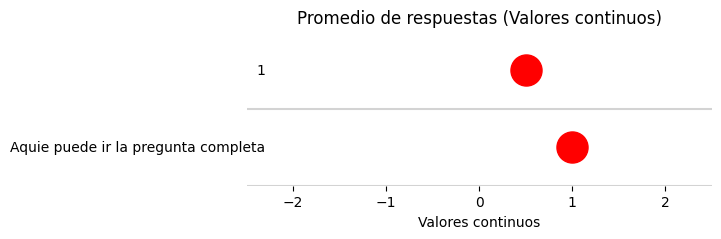

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo
opciones_ordinales = ['Opción 1', 'Opción 2', 'Opción 3', 'Opción 4']
respuestas = [1, 0, -1, 2]  # Ejemplo de respuestas convertidas a valores continuos

# Cálculo del promedio
promedio = [sum(respuestas) / len(respuestas), 2]

# Crear la figura y los ejes del gráfico de dispersión
fig, ax = plt.subplots()

# Configurar el rango y tamaño de los ejes
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(0, 2)

# Configurar el tamaño del punto
size = 500

# Dibujar el punto del promedio
ax.scatter([0.5, 1], [1.5, 0.5],  color='red', s=size, marker='o')



# Eliminar el recuadro
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.axes.get_yaxis().set_visible(False)

ax.axhline(y=0, color='lightgrey')

ax.text(-2.3, 0.5, 'Aquie puede ir la pregunta completa', color='black', ha='right', va='center')
ax.text(-2.3, 1.5, '1', color='black', ha='right', va='center')



ax.axhline(y=1, color='lightgrey', xmin=-1, xmax=1)


# Etiquetas de los ejes
ax.set_xlabel('Valores continuos')
ax.set_ylabel('')

# Título del gráfico
ax.set_title('Promedio de respuestas (Valores continuos)')
fig.set_size_inches(6, 2)


# Mostrar el gráfico


Hay que usar la scatterplot en Power BI

La tabla de think deben pasarse de esta forma

## 2020 occ tables en ES

In [ ]:
test = df_mean('occupation_d', ['tlm_1',	'tlm_2',	'tlm_3',	'tlm_4',
      'tlm_5',	'tlm_6',	'tly_1',	'tly_2',
      'tly_3',	'tly_4',	'tly_5',	'tly_6',
      'cur_1',	'cur_2',	'cur_3'], df20).reset_index()

In [ ]:
t_dict ={
  'tlm_1':'My organisation encouraged people to work remotely (2020)',
  'tlm_2':'It was easy to get permission to work remotely (2020)',
  'tlm_3':'It was common for people in my organisation to work remotely (2020)',
  'tlm_4':'It was easy to get permission to work remotely (2020)',
  'tlm_5':'I could easily collaborate with colleagues when working remotely (2020)',
  'tlm_6':'I would recommend remote working to others (2020)',
  'tly_1':'My organisation encouraged people to work remotely (2019)',
  'tly_2':'My organisation was well prepared for me to work remotely (2019)',
  'tly_3':'It was common for people in my organisation to work remotely (2019)',
  'tly_4':'It was easy to get permission to work remotely (2019)',
  'tly_5':'I could easily collaborate with colleagues when working remotely (2019)',
  'tly_6':'I would recommend remote working to others (2019)',
  'cur_1':'My employer would encourage more remote working (2021)',
  'cur_2':'My employer would make changes to support remote working (2021)',
  'cur_3':'I would have more choice about whether I work remotely (2021)'}

In [ ]:
t_dict_ES = {
    'tlm_1': 'Mi organización alentó a las personas a trabajar de forma remota (2020)',
    'tlm_2': 'Fue fácil obtener permiso para trabajar de forma remota (2020)',
    'tlm_3': 'Era común que las personas en mi organización trabajaran de forma remota (2020)',
    'tlm_4': 'Fue fácil obtener permiso para trabajar de forma remota (2020)',
    'tlm_5': 'Pude colaborar fácilmente con colegas mientras trabajaba de forma remota (2020)',
    'tlm_6': 'Recomendaría el trabajo remoto a otros (2020)',
    'tly_1': 'Mi organización alentó a las personas a trabajar de forma remota (2019)',
    'tly_2': 'Mi organización estaba bien preparada para que yo trabajara de forma remota (2019)',
    'tly_3': 'Era común que las personas en mi organización trabajaran de forma remota (2019)',
    'tly_4': 'Fue fácil obtener permiso para trabajar de forma remota (2019)',
    'tly_5': 'Pude colaborar fácilmente con colegas mientras trabajaba de forma remota (2019)',
    'tly_6': 'Recomendaría el trabajo remoto a otros (2019)',
    'cur_1': 'Mi empleador alentaría más trabajo remoto (2021)',
    'cur_2': 'Mi empleador haría cambios para respaldar el trabajo remoto (2021)',
    'cur_3': 'Tendría más opciones sobre si trabajo de forma remota (2021)'
}


In [ ]:
test = test.rename(columns=t_dict)

In [ ]:
test.to_csv("think20OK.csv", index=False)

In [ ]:
df20 = pd.read_csv("db_2020.csv")

In [ ]:
occ_think20 = df20[['occupation_d', 'tlm_1',	'tlm_2',	'tlm_3',	'tlm_4',
      'tlm_5',	'tlm_6',	'tly_1',	'tly_2',
      'tly_3',	'tly_4',	'tly_5',	'tly_6',
      'cur_1',	'cur_2',	'cur_3']].rename(columns=t_dict_ES)

In [ ]:
df20['occupation_d'].value_counts(dropna=False)

Gerentes Especialistas                                             262
Directores Ejecutivos, Gerentes Generales y Legisladores           193
Profesionales de Negocios, Recursos Humanos y Marketing            148
Profesionales de Tecnologías de la Información y Comunicación      119
Profesionales de Diseño, Ingeniería, Ciencia y Transporte          105
Profesionales de la Educación                                       88
Apoyo Clerical y de Oficina                                         52
Otros Clericales y Administrativos                                  47
Representantes y Agentes de Ventas                                  45
Gerentes de Hospitalidad, Retail y Servicios                        44
Profesionales de la Salud                                           43
Profesionales Legales, Sociales y de Bienestar                      41
Asistentes Personales y Secretarias                                 38
Clerical General                                                    37
Gerent

In [ ]:
occ_think20.to_csv("occ_think20_ES.csv", index=False)

In [ ]:
occ_think20.to_csv("occ_think20_ES.csv", index=False)

In [ ]:
rwp_dict = {
    'productivity': 'Productiviy',
    'time_workplace1':'Preparing for work and commuting wp',
    'time_workplace2':'Working wp',
    'time_workplace3':'Personal and family time wp',
    'time_workplace4':'Caring and domestic responsibilities wp',
    'time_remote1':'Preparing for work and commuting rw',
    'time_remote2':'Working rw',
    'time_remote3':'Personal and family time rw',
    'time_remote4':'Caring and domestic responsibilities rw',

}

In [ ]:
rwp_dict_ES = {
    'productivity': 'Productividad',
    'time_workplace1': 'Preparación para el trabajo y desplazamiento en el lugar de trabajo',
    'time_workplace2': 'Trabajo en el lugar de trabajo',
    'time_workplace3': 'Tiempo personal y familiar en el lugar de trabajo',
    'time_workplace4': 'Responsabilidades de cuidado y domésticas en el lugar de trabajo',
    'time_remote1': 'Preparación para el trabajo y desplazamiento en el trabajo remoto',
    'time_remote2': 'Trabajo en el trabajo remoto',
    'time_remote3': 'Tiempo personal y familiar en el trabajo remoto',
    'time_remote4': 'Responsabilidades de cuidado y domésticas en el trabajo remoto'
}


In [ ]:
occ_rwp20 = df20[['occupation_d'] + list(rwp_dict_ES.keys())].rename(columns=rwp_dict_ES)

In [ ]:
occ_rwp20.to_csv("occ_rwp20_ES.csv", index=False)

In [ ]:
barr_dict_ES ={
    'most_barrier': 'barrera más significativa para realizar tu trabajo de forma remota',
    'least_barrier': 'barrera menos significativa para realizar tu trabajo de forma remota',
    'best_remote': 'mejor aspecto del trabajo remoto para ti',
    'worst_remote': 'peor aspecto del trabajo remoto para ti'
}

In [ ]:
set(df20['most_barrier'].unique()) | set(df20['least_barrier'].unique())

{'Ciberseguridad',
 'Conectividad (conexión a internet)',
 'Dificultad para colaborar de forma remota',
 'El software y los sistemas de mi organización',
 'Equipos de IT ',
 'Falta de habilidades para trabajar de forma remota',
 'Falta de motivación',
 'Gestión deficiente',
 'La dirección desalienta el trabajo remoto',
 'Mi espacio de trabajo',
 'Mi situación de vida',
 'Responsabilidades de cuidado',
 'Sentirse excluido y/o aislado',
 'Tengo tareas que no se pueden realizar de forma remota'}

In [ ]:
barriers_ES = {
    'Caring responsibilities': 'Responsabilidades de cuidado',
    'Connectivity (internet connection)': 'Conectividad (conexión a internet)',
    'Cyber security': 'Ciberseguridad',
    'Difficulty collaborating remotely': 'Dificultad para colaborar de forma remota',
    'Feeling left out and/or isolated': 'Sentirse excluido y/o aislado',
    "I have tasks that can't be done remotely": 'Tengo tareas que no se pueden realizar de forma remota',
    'IT equipment (computer, printer, etc.)': 'Equipos de IT ',
    'Lack of motivation': 'Falta de motivación',
    'Lack of remote working skills': 'Falta de habilidades para trabajar de forma remota',
    'Management discourages remote working': 'La dirección desalienta el trabajo remoto',
    'My living situation (e.g. location, home size, who I live with)': 'Mi situación de vida',
    "My organisation's software and systems": 'El software y los sistemas de mi organización',
    'My workspace (e.g. suitable chair, lighting, noise levels, facilities)': 'Mi espacio de trabajo',
    'Poor management': 'Gestión deficiente'
}


In [ ]:
set(df20['best_remote'].unique()) | set(df20['worst_remote'].unique())

{'Gestionar mis compromisos personales',
 'Gestionar mis responsabilidades familiares',
 'La cantidad de horas que trabajo',
 'Mi bienestar mental',
 'Mi equilibrio entre el trabajo y la vida personal',
 'Mi satisfacción laboral',
 'Mis gastos diarios',
 'Mis oportunidades de aprendizaje en el trabajo',
 'Mis oportunidades de socializar',
 'Mis relaciones laborales',
 'Mis relaciones personales',
 'Preparación para el trabajo y el desplazamiento'}

In [ ]:
aspects_ES = {
    'Managing my family responsibilities': 'Gestionar mis responsabilidades familiares',
    'Managing my personal commitments': 'Gestionar mis compromisos personales',
    'My daily expenses': 'Mis gastos diarios',
    'My job satisfaction': 'Mi satisfacción laboral',
    'My mental wellbeing': 'Mi bienestar mental',
    'My on-the-job learning opportunities': 'Mis oportunidades de aprendizaje en el trabajo',
    'My opportunities to socialise': 'Mis oportunidades de socializar',
    'My personal relationships': 'Mis relaciones personales',
    'My work-life balance': 'Mi equilibrio entre el trabajo y la vida personal',
    'My working relationships': 'Mis relaciones laborales',
    'Preparing for work and commuting': 'Preparación para el trabajo y el desplazamiento',
    'The number of hours  I work': 'La cantidad de horas que trabajo'
}


In [ ]:
df20['most_barrier'] = df20['most_barrier'].map(barriers_ES)
df20['least_barrier'] = df20['least_barrier'].map(barriers_ES)
df20['best_remote'] = df20['best_remote'].map(aspects_ES)
df20['worst_remote'] = df20['worst_remote'].map(aspects_ES)

In [ ]:
occ_barr20_ES = df20[['occupation_d'] + list(barr_dict_ES.keys())].rename(columns=barr_dict_ES)

In [ ]:
occ_barr20_ES.head()

occupation_d  \
0                 Otros Clericales y Administrativos   
1  Directores Ejecutivos, Gerentes Generales y Le...   
2  Directores Ejecutivos, Gerentes Generales y Le...   
3  Profesionales de Tecnologías de la Información...   
4                             Gerentes Especialistas   

  barrera más significativa para realizar tu trabajo de forma remota  \
0          Dificultad para colaborar de forma remota                   
1                                     Equipos de IT                    
2                                 Gestión deficiente                   
3                                Falta de motivación                   
4                                 Gestión deficiente                   

  barrera menos significativa para realizar tu trabajo de forma remota  \
0                                     Ciberseguridad                     
1                      Sentirse excluido y/o aislado                     
2                                Falta de motivación                     
3                                Falta de motivación                     
4                 Conectividad (conexión a internet)                     

            mejor aspecto del trabajo remoto para ti  \
0               Gestionar mis compromisos personales   
1  Mi equilibrio entre el trabajo y la vida personal   
2                   La cantidad de horas que trabajo   
3  Mi equilibrio entre el trabajo y la vida personal   
4    Preparación para el trabajo y el desplazamiento   

           peor aspecto del trabajo remoto para ti  
0                         Mis relaciones laborales  
1   Mis oportunidades de aprendizaje en el trabajo  
2  Preparación para el trabajo y el desplazamiento  
3   Mis oportunidades de aprendizaje en el trabajo  
4   Mis oportunidades de aprendizaje en el trabajo

In [ ]:
occ_barr20_ES.to_csv("occ_barr20_ES.csv", index=False)

## 2021 occ tables en ES

In [ ]:
occ_pol ={
  'arra_updated_policy': 'Has your employer changed or updated their policy on remote work since COVID-19?',
  'past_6months': 'have you ever worked part of your day remotely, and part of it at your employer s workplace (2021)',
  'how_often1': 'How often do you work this way?',
  'how_often_like1':'How often would you like to work this way?',
  'policy_workplace':'Does your employer have a policy that workers must be at the employer s workplace some of the time?',
  'policy_workplace_time': 'How much of your work time does your employers policy require you to be at their workplace?',
  't_policy1': '(prw) My employers remote working policy suits me',
  't_policy2':'(prw) I get to choose how much work I do remotely',
  't_policy3':'(prw) I choose which days I work remotely',
  't_policy4': '(prw) My direct manager has discretion to allow or deny remote work',
  'feel_remote_policy': 'How do you feel about your employers remote working policy?',
  'remote_paycut': 'Would you be interested in negotiating remore work?',
  'biggest_paycut': 'What is the biggest pay cut you would accept?'}

In [ ]:
occ_pol_dict_ES ={
     'arra_updated_policy': '¿Tu empleador ha cambiado o actualizado su política sobre el trabajo remoto desde COVID-19?',
    'past_6months': '¿Has trabajado alguna vez parte de tu día de forma remota y parte en el lugar de trabajo de tu empleador (2021)?',
    'how_often1': '¿Con qué frecuencia trabajas de esta manera?',
    'how_often_like1': '¿Con qué frecuencia te gustaría trabajar de esta manera?',
    'policy_workplace': '¿Tu empleador tiene una política que requiere que los trabajadores estén en el lugar de trabajo del empleador parte del tiempo?',
    'policy_workplace_time': '¿Cuánto tiempo de tu jornada laboral requiere la política de tu empleador que estés en su lugar de trabajo?',
    't_policy1': '(prw) La política de trabajo remoto de mi empleador me conviene',
    't_policy2': '(prw) Puedo elegir cuánto trabajo hago de forma remota',
    't_policy3': '(prw) Elijo en qué días trabajo de forma remota',
    't_policy4': '(prw) Mi supervisor directo tiene la discreción de permitir o denegar el trabajo remoto',
    'feel_remote_policy':'¿Cómo te sientes acerca de la política de trabajo remoto de tu empleador?',
     'remote_paycut': '¿Estarías interesado/a en negociar el trabajo remoto?',
    'biggest_paycut': '¿Cuál es la mayor reducción de salario que aceptarías?'
}

In [ ]:
occ_pol_ES = df21[['occupation_d'] + list(occ_pol_dict_ES.keys())].rename(columns=occ_pol_dict_ES)

In [ ]:
occ_pol_ES.to_csv("occ_pol21_ES.csv", index=False)

In [ ]:
rwp21_dict = {'think_workplace1': 'Preparing for work and commuting wp',
              'think_workplace2': 'Working wp',
              'think_workplace3':'Caring and domestic responsibilities wp',
              'think_workplace4':'Personal and family time wp',
              'think_workplace5' :'Sleep wp',
              'think_remote1': 'Preparing for work and commuting rw',
              'think_remote2':'Working rw',
              'think_remote3':'Caring and domestic responsibilities rw',
              'think_remote4':'Personal and family time rw',
              'think_remote5':'Sleep rw'}

In [ ]:
rwp21_dict_ES = {
    'think_workplace1': 'Preparación para el trabajo y desplazamiento en el lugar de trabajo',
    'think_workplace2': 'Trabajo en el lugar de trabajo',
    'think_workplace3': 'Responsabilidades de cuidado y domésticas en el lugar de trabajo',
    'think_workplace4': 'Tiempo personal y familiar en el lugar de trabajo',
    'think_workplace5': 'Sueño en el lugar de trabajo',
    'think_remote1': 'Preparación para el trabajo y desplazamiento en el trabajo remoto',
    'think_remote2': 'Trabajo en el trabajo remoto',
    'think_remote3': 'Responsabilidades de cuidado y domésticas en el trabajo remoto',
    'think_remote4': 'Tiempo personal y familiar en el trabajo remoto',
    'think_remote5': 'Sueño en el trabajo remoto'
}


In [ ]:
occ_rwp21_ES = df21[['occupation_d'] + list(rwp21_dict_ES.keys())].rename(columns=rwp21_dict_ES)

In [ ]:
occ_rwp21_ES.to_csv('occ_rwp21_ES.csv', index=False)

In [ ]:
df21 = pd.read_csv("db_2021.csv")

In [ ]:
likely_map = {
    'Somewhat likely': 1,
    'Neither unlikely or likely': 0,
    'Somewhat unlikely': -1,
    'Very likely': 2,
    'Very unlikely': -2}

agree_map = {
    'Strongly agree': 2,
    'Neither agree nor disagree': 0,
    'Somewhat agree': 1,
    'Somewhat disagree': -1,
    'Strongly disagree': -2
}

posneg_map = {
    'Strongly Positive': 2,
    'Somewhat Positive': 1,
    'Neither positive nor negative': 0,
    'Somewhat Negative': -1,
    'Strongly Negative': -2
}



In [ ]:
df21[occ_think21.keys()]

think_6months1  think_6months2  think_6months3  think_6months4  \
0                  1               1               2               1   
1                  0               0               0               0   
2                  2               2               2               2   
3                  0               0               1               0   
4                  1               2               1               1   
...              ...             ...             ...             ...   
1507               0               1               0               1   
1508              -1              -1              -2               0   
1509              -2              -2              -2              -2   
1510               1               1               1               2   
1511               0               0               1               0   

      think_6months5  think_6months6  think_6months7  think_remote  \
0                  1              -1              -1             2   
1                  0               0               0            -1   
2                  2              -2               2             1   
3                  0              -1              -1            -1   
4                  2               0               1             2   
...              ...             ...             ...           ...   
1507               1               1               1             1   
1508               0               0               1            -1   
1509               2              -2               0             1   
1510               1               0               1             1   
1511               0               1               0             1   

              most_supportive  covid_cured1  covid_cured2  covid_cured3  
0     They are about the same             1             1             1  
1     They are about the same             0             0             0  
2           Senior leadership            -1             1             2  
3     They are about the same             1             1             1  
4         My direct manger(s)             1             1             1  
...                       ...           ...           ...           ...  
1507      My direct manger(s)             1             0             1  
1508  They are about the same            -2            -2            -2  
1509  They are about the same            -2            -2            -2  
1510  They are about the same             1             1             1  
1511      My direct manger(s)             1             1             1  

[1512 rows x 12 columns]

In [ ]:
for col in ['think_6months'+str(i) for i in range(1, 8)]:
  df21[col] = df21[col].map(agree_map)
df21['think_remote'] = df21['think_remote'].map(posneg_map)
for col in ['covid_cured'+str(i) for i in range(1, 4)]:
  df21[col] = df21[col].map(likely_map)

In [ ]:
occ_think21 = {
    'think_6months1': 'My organisation encouraged people to work remotely',
    'think_6months2': 'My organisation was well prepared for me to work remotely',
    'think_6months3': 'It was common for people in my organisation to work remotely',
    'think_6months4': 'It was easy to get permission to work remotely',
    'think_6months5': 'I could easily collaborate with colleagues when working remotely',
    'think_6months6': 'Working remotely reduces my chances of promotion',
    'think_6months7': 'I take more regular breaks while working remotely',
    'think_remote': 'Do you think remote working is a positive or a negative for your employer?',
    'most_supportive': 'Who is most supportive of remote working in your organisation?',
    'covid_cured1': 'My employer would encourage more remote working',
    'covid_cured2': 'My employer would make changes to support remote working',
    'covid_cured3': 'I would have more choice about whether I work remotely'
}


In [ ]:
occ_think21_ES_dict = {
    'think_6months1': 'Mi organización alentó a las personas a trabajar de forma remota (últimos 6 meses)',
    'think_6months2': 'Mi organización estaba bien preparada para que yo trabajara de forma remota (últimos 6 meses)',
    'think_6months3': 'Era común que las personas en mi organización trabajaran de forma remota (últimos 6 meses)',
    'think_6months4': 'Fue fácil obtener permiso para trabajar de forma remota (últimos 6 meses)',
    'think_6months5': 'Pude colaborar fácilmente con colegas mientras trabajaba de forma remota (últimos 6 meses)',
    'think_6months6': 'Trabajar de forma remota reduce mis posibilidades de ascenso (últimos 6 meses)',
    'think_6months7': 'Tomo descansos más regulares mientras trabajo de forma remota (últimos 6 meses)',
    'think_remote': '¿Consideras que el trabajo remoto es algo positivo o negativo para tu empleador?',
    'most_supportive': '¿Quién es el mayor defensor del trabajo remoto en tu organización?',
    'covid_cured1': 'Mi empleador alentaría más trabajo remoto (después de la pandemia de COVID-19)',
    'covid_cured2': 'Mi empleador realizaría cambios para respaldar el trabajo remoto (después de la pandemia de COVID-19)',
    'covid_cured3': 'Tendría más opciones sobre si trabajo de forma remota (después de la pandemia de COVID-19)'
}


In [ ]:
occ_think21_ES = df21[['occupation_d'] + list(occ_think21_ES_dict.keys())].rename(columns=occ_think21_ES_dict)

In [ ]:
occ_think21_ES.to_csv("occ_think21_ES.csv", index=False)

In [ ]:
s_1 = ['statements1', 'statements2', 'statements_2']

In [ ]:
s_1_dict = {
    'statements1': 'On days when I work remotely I feel better',
    'statements2': 'On days when I work remotely I am more active',
    'statements_2': 'I feel better on days when I see my colleagues in person'
}


In [ ]:
s_1_dict_ES = {
    'statements1': 'En los días en los que trabajo de forma remota me siento mejor',
    'statements2': 'En los días en los que trabajo de forma remota estoy más activo/a',
    'statements_2': 'Me siento mejor en los días en los que veo a mis colegas en persona'
}


In [ ]:
for col in s_1:
  df21[col] = df21[col].map(agree_map)

In [ ]:
occ_s_1__ES = df21[['occupation_d'] + list(s_1_dict_ES.keys())].rename(columns=s_1_dict_ES)

In [ ]:
occ_s_1__ES.to_csv("occ_s1_ES.csv", index=False)

In [ ]:
df21 = pd.read_csv("db_2021.csv")

In [ ]:
df21[['occupation_d']+occ_manage]

occupation_d manage_people  \
0     Profesionales de Tecnologías de la Información...            No   
1     Profesionales de Tecnologías de la Información...            No   
2     Profesionales de Negocios, Recursos Humanos y ...            No   
3                             Profesionales de la Salud           Yes   
4                                Gerentes Especialistas            No   
...                                                 ...           ...   
1507  Directores Ejecutivos, Gerentes Generales y Le...           Yes   
1508                          Profesionales de la Salud           Yes   
1509                        Apoyo Clerical y de Oficina            No   
1510  Directores Ejecutivos, Gerentes Generales y Le...           Yes   
1511  Gerentes de Oficina y Administradores de Progr...            No   

     employees_manage_remote  productive_employees1  ss_3  ss11  ss12  ss1_2  \
0                        NaN                    NaN   NaN   NaN   NaN    NaN   
1                        NaN                    NaN   NaN   NaN   NaN    NaN   
2                        NaN                    NaN   NaN   NaN   NaN    NaN   
3                        Yes                   50.0   0.0   0.0   0.0    0.0   
4                        NaN                    NaN   NaN   NaN   NaN    NaN   
...                      ...                    ...   ...   ...   ...    ...   
1507                     Yes                   30.0   1.0   0.0   1.0    1.0   
1508                      No                    0.0   NaN   NaN   NaN    NaN   
1509                     NaN                    NaN   NaN   NaN   NaN    NaN   
1510                     Yes                    0.0   1.0   1.0   1.0    1.0   
1511                     NaN                    NaN   NaN   NaN   NaN    NaN   

      ss21  ss22  ss2_2  ss2_3  ss23  
0      NaN   NaN    NaN    NaN   NaN  
1      NaN   NaN    NaN    NaN   NaN  
2      NaN   NaN    NaN    NaN   NaN  
3      0.0   0.0    0.0    0.0   0.0  
4      NaN   NaN    NaN    NaN   NaN  
...    ...   ...    ...    ...   ...  
1507   1.0   1.0    0.0    1.0   1.0  
1508   NaN   NaN    NaN    NaN   NaN  
1509   NaN   NaN    NaN    NaN   NaN  
1510  -1.0  -1.0    1.0    1.0   1.0  
1511   NaN   NaN    NaN    NaN   NaN  

[1512 rows x 13 columns]

In [ ]:
occ_manage = ['manage_people', 'employees_manage_remote', 'productive_employees1',
              'ss_3',	'ss11',	'ss12',	'ss1_2',	'ss21',
              'ss22',	'ss2_2',	'ss2_3',	'ss23']

In [ ]:
occ_manage_dict_ES = {
    'manage_people': '¿Gestionas personas como parte de tu trabajo actual?',
    'employees_manage_remote': '¿Los empleados que gestionas trabajan de forma remota alguna vez?',
    'productive_employees1': 'Tengo discreción para ofrecer o denegar el trabajo remoto a los empleados que gestiono',
    'ss_3': 'Ofrecer trabajo remoto me ayuda a retener empleados',
    'ss11': 'Ofrecer trabajo remoto me ayuda a reclutar empleados',
    'ss12': 'Mi equipo funciona bien cuando trabajan de forma remota',
    'ss1_2': 'Me resulta fácil gestionar empleados de forma remota (por ejemplo, asignar tareas y controlar el progreso)',
    'ss21': 'Me resulta fácil gestionar empleados con bajo rendimiento de forma remota',
    'ss22': 'Me siento bien preparado/a para gestionar empleados de forma remota',
    'ss2_2': 'Gestionar personas de forma remota me hace estar más enfocado/a en los resultados',
    'ss2_3': 'Me resulta fácil contactar a mis empleados cuando trabajan de forma remota'
}


In [ ]:
occ_manage21_ES = df21[['occupation_d'] + list(occ_manage_dict_ES.keys())].rename(columns=occ_manage_dict_ES)

In [ ]:
occ_manage21_ES.to_csv("occ_manage21_ES.csv", index=False)

In [ ]:
barrier21 = ['bar_rem1',	'bar_rem2',	'bar_rem3',	'bar_rem4',	'bar_rem5',
      'bar_rem6',	'bar_rem7',	'bar_rem8',	'bar_rem9',	'bar_rem10',
      'bar_rem11',	'bar_rem12',	'bar_rem13',	'bar_rem14',	'bar_rem15',
      'bar_rem16',	'biggest_b_colle',	'smallest_b_colle']

In [ ]:
barriers21_dES = {
    'bar_rem1': 'Mis responsabilidades de cuidado',
    'bar_rem2': 'Conectividad',
    'bar_rem3': 'Software y sistemas de mi organización',
    'bar_rem4': 'Dificultad para colaborar de forma remota',
    'bar_rem5': 'Mala gestión',
    'bar_rem6': 'Equipos informáticos',
    'bar_rem7': 'Sentirse excluido/a y/o aislado/a',
    'bar_rem8': 'Costos adicionales',
    'bar_rem9': 'Ciberseguridad',
    'bar_rem10': 'Tengo tareas que no se pueden realizar de forma remota',
    'bar_rem11': 'Mi espacio de trabajo ',
    'bar_rem12': 'Motivación',
    'bar_rem13': 'La gerencia desalienta el trabajo remoto',
    'bar_rem14': 'Mi situación de vida',
    'bar_rem15': 'Falta de habilidades para trabajar de forma remota',
    'bar_rem16': 'Mi salud y seguridad al trabajar de forma remota',
    'biggest_b_colle': '¿Cuáles fueron las barreras más grandes al trabajar de esta manera?',
    'smallest_b_colle': '¿Cuáles fueron las barreras más pequeñas al trabajar de esta manera?'
}


In [ ]:
barriers21_ES = df21[['occupation_d'] + list(barriers21_dES.keys())].rename(columns=barriers21_dES)

In [ ]:
set(barriers21_ES['¿Cuáles fueron las barreras más grandes al trabajar de esta manera?'].unique()) | set(barriers21_ES['¿Cuáles fueron las barreras más pequeñas al trabajar de esta manera?'].unique())

{'Connectivity/internet issues',
 'Difficulty collaborating with remote colleagues',
 'Difficulty innovating',
 'Interruptions',
 'Lack of appropriate work and meeting spaces',
 'Lack of privacy',
 'Noisy work environment',
 'Problems with audio-visual setup',
 nan}

In [ ]:
barr_hibri = {
    'Connectivity/internet issues': 'Problemas de conectividad/internet',
    'Difficulty collaborating with remote colleagues': 'Dificultad para colaborar con colegas remotos',
    'Difficulty innovating': 'Dificultad para innovar',
    'Interruptions': 'Interrupciones',
    'Lack of appropriate work and meeting spaces': 'Falta de espacios de trabajo y reuniones adecuados',
    'Lack of privacy': 'Falta de privacidad',
    'Noisy work environment': 'Entorno de trabajo ruidoso',
    'Problems with audio-visual setup': 'Problemas con la configuración de audio y video',
    float('nan'): float('nan')
}



In [ ]:
barriers21_ES['¿Cuáles fueron las barreras más grandes al trabajar de esta manera?'] = barriers21_ES['¿Cuáles fueron las barreras más grandes al trabajar de esta manera?'].map(barr_hibri)

In [ ]:
barriers21_ES['¿Cuáles fueron las barreras más pequeñas al trabajar de esta manera?'] = barriers21_ES['¿Cuáles fueron las barreras más pequeñas al trabajar de esta manera?'].map(barr_hibri)

In [ ]:
barriers21_ES.to_csv("barriers21_ES.csv", index=False)

# Base de datos normalizada

## Nuevas tablas 2020

In [ ]:
df20[['id',
    'year_born', 'gender',
      'industry', 'industry_d',
      'occupation', 'occupation_d', 'm_r',
      'organisation_size', 'manage_people',
      'household', 'how_long']].to_csv("person20.csv", index=False)

In [ ]:
df20[['id',
    'time_workplace1',	'time_workplace2',
      'time_workplace3',	'time_workplace4',
      'time_remote1',	'time_remote2',
      'time_remote3',	'time_remote4']].to_csv("habit_time20,csv", index=False)

In [ ]:
df20[['id', 'time_remote_last_year',	'time_preferred_remote_last_year',
      'time_remote_last_months',	'time_preferred_remote_last_months',
      'time_preferred_postcovid',	'productivity']].to_csv("time_remote20.csv", index=False)

In [ ]:
df20[['id', 'tlm_1',	'tlm_2',	'tlm_3',	'tlm_4',
      'tlm_5',	'tlm_6',	'tly_1',	'tly_2',
      'tly_3',	'tly_4',	'tly_5',	'tly_6',
      'cur_1',	'cur_2',	'cur_3']].to_csv("think20.csv", index=False)

In [ ]:
df20[['id', 'most_barrier',	'least_barrier',	'best_remote',	'worst_remote']].to_csv("barrier20.csv", index=False)

## Nuevas tablas 2021

In [ ]:
df21[['id',
    'year_born', 'gender',
      'industry',
      'occupation', 'occupation_d', 'm_r',
      'organisation', 'manage_people',
      'household', 'how_long']].to_csv("person21.csv", index=False)

In [ ]:
df21[['id', 'arra_updated_policy', 'past_6months', 'how_often1',	'how_often_like1',
      'policy_workplace',	'policy_workplace_time',
      't_policy1',	't_policy2',	't_policy3',	't_policy4',
      'remote_paycut',	'biggest_paycut']].to_csv('policy21.csv', index=False)

In [ ]:
df21[['id',
    'think_workplace1',	'think_workplace2',
      'think_workplace3',	'think_workplace4',	'think_workplace5',
      'think_remote1',	'think_remote2',
      'think_remote3',	'think_remote4','think_remote5']].to_csv("habit_time21,csv", index=False)

In [ ]:
df21[['id', 'ss1', 'ss2', 'ss_2']].to_csv("feel21.csv", index=False)

In [ ]:
df21[['id', 'manage_people', 'employees_manage_remote', 'productive_employees1',
     'ss_3',	'ss11',	'ss12',	'ss1_2',	'ss21',
      'ss22',	'ss2_2',	'ss2_3',	'ss23']].to_csv("manage21.csv", index=False)

In [ ]:
df21[['id', 'bar_rem1',	'bar_rem2',	'bar_rem3',	'bar_rem4',	'bar_rem5',
      'bar_rem6',	'bar_rem7',	'bar_rem8',	'bar_rem9',	'bar_rem10',
      'bar_rem11',	'bar_rem12',	'bar_rem13',	'bar_rem14',	'bar_rem15',
      'bar_rem16',	'biggest_b_colle',	'smallest_b_colle']].to_csv('barrier21.csv', index=False)

In [ ]:
df21[['remote_last_quarter1',	'remote_preferred_last_quarter1',
      'remote_this_year1',	'remote_preferred_this_year1',
      'covid_cured_preferred_remote1',
      'productive1']].to_csv('time_remote21.csv', index= False)

In [ ]:
think_workplace = [col for col in df.columns if col.startswith('think_workplace')] #hours


In [ ]:
cd drive/MyDrive/Adeco_

# Headmaps

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler


def df_mean(grupo, variables, df):
  cols = [grupo] + variables
  df_temp = df[cols]
  # Crear el nuevo DataFrame agrupando y calculando los promedios
  return df_temp.groupby(grupo).mean()



def head_map(grupo, variables, df):

  # Crear el heatmap

  df_temp = df_mean(grupo, variables, df)
  # Calcular la suma en cada fila

  # Normalizar los valores de las columnas
  scaler = MinMaxScaler()
  df_temp[variables] = scaler.fit_transform(df_temp[variables])


  row_sums = df_temp.sum(axis=1)

  colors = sns.color_palette(["#DDF7E3", "#5D9C59"])  # Puedes modificar los códigos de color aquí
  cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)


  # Tamaño de las celdas (cuadradas)
  cell_size = 0.3  # Ajusta el tamaño de las celdas según tus necesidades

  # Obtener el número de filas y columnas
  n_rows, n_cols = df_temp.shape

  # Establecer el tamaño de la figura en función del número de filas y columnas
  fig, ax = plt.subplots(figsize=(cell_size * n_cols, cell_size * n_rows))

  heatmap = sns.heatmap(df_temp, cmap=cmap, annot=False, linewidths=0.5)

  # Mostrar el heatmap
  plt.show()

In [ ]:
cd drive/MyDrive/Adecco_caso/

/content/drive/MyDrive/Adecco_caso


In [ ]:
df20 = pd.read_csv("db_2020.csv")
df21 = pd.read_csv("db_2021.csv")


### think_remote

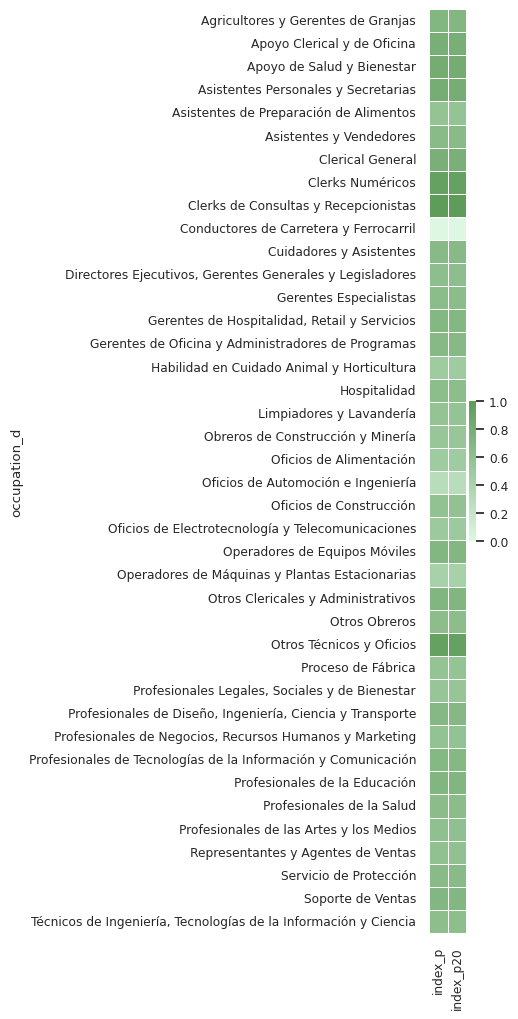

In [ ]:
head_map('occupation_d', ['index_p',	'index_p20'], df20)

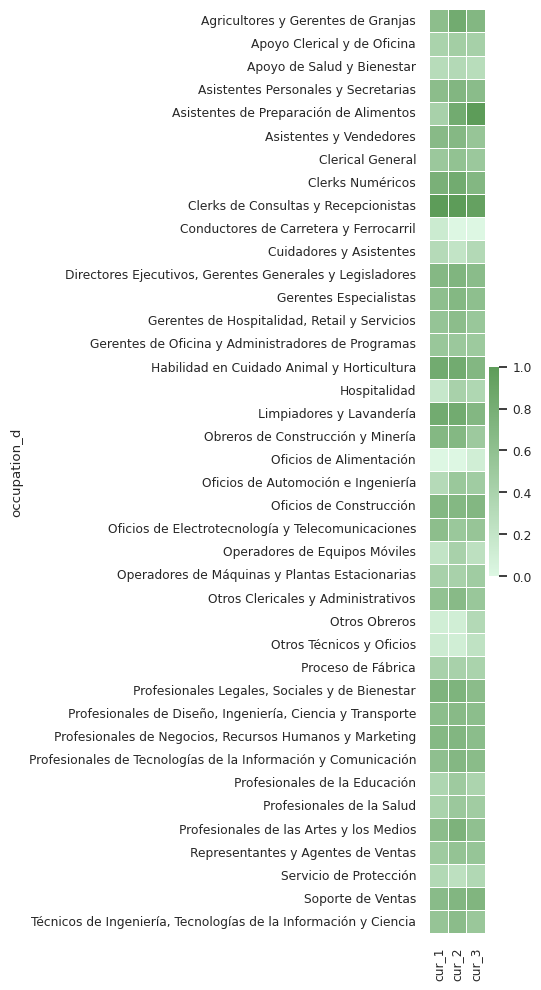

In [ ]:
head_map('occupation_d', ['cur_1',	'cur_2',	'cur_3'], df20)

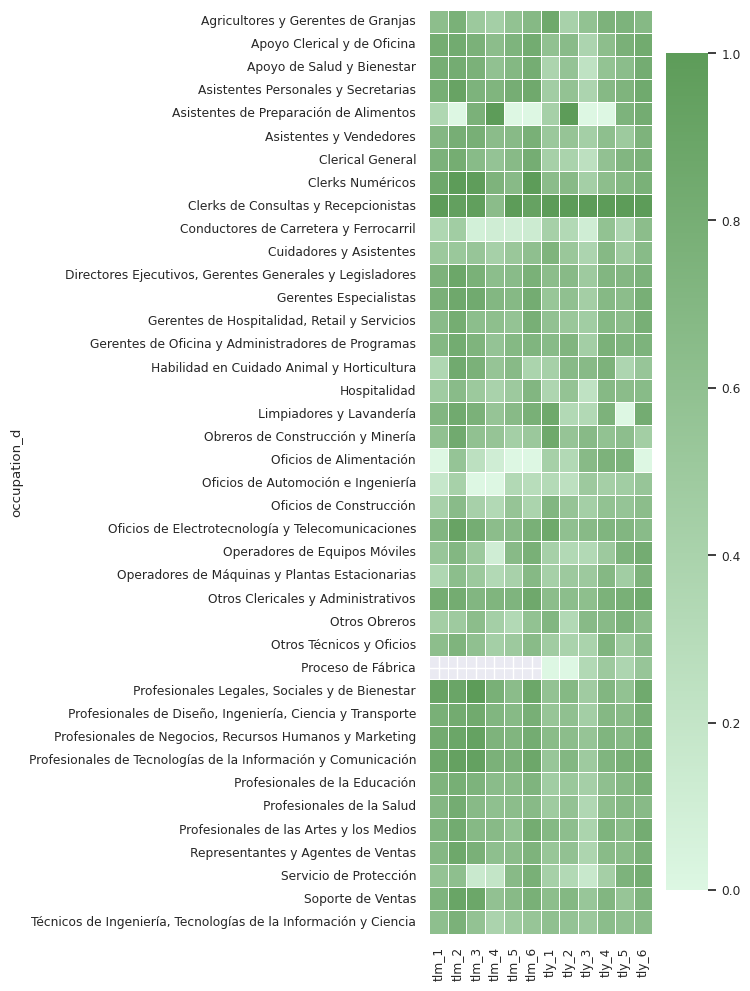

In [ ]:
head_map('occupation_d', ['tlm_1',	'tlm_2',	'tlm_3',	'tlm_4',	'tlm_5',
                          'tlm_6',	'tly_1',	'tly_2',	'tly_3',	'tly_4',
                          'tly_5',	'tly_6'], df20 )

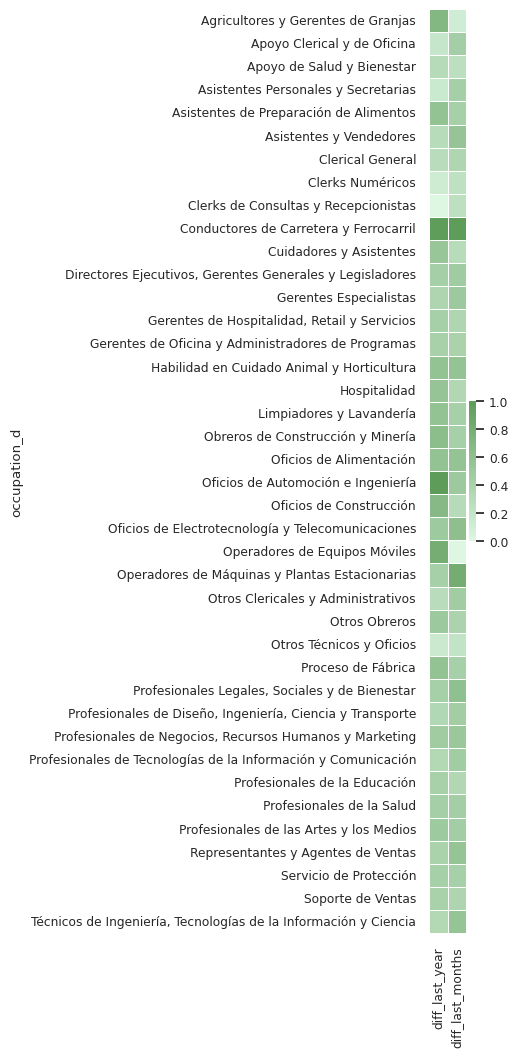

In [ ]:
head_map('occupation_d', ['diff_last_year',	'diff_last_months'], df20 )

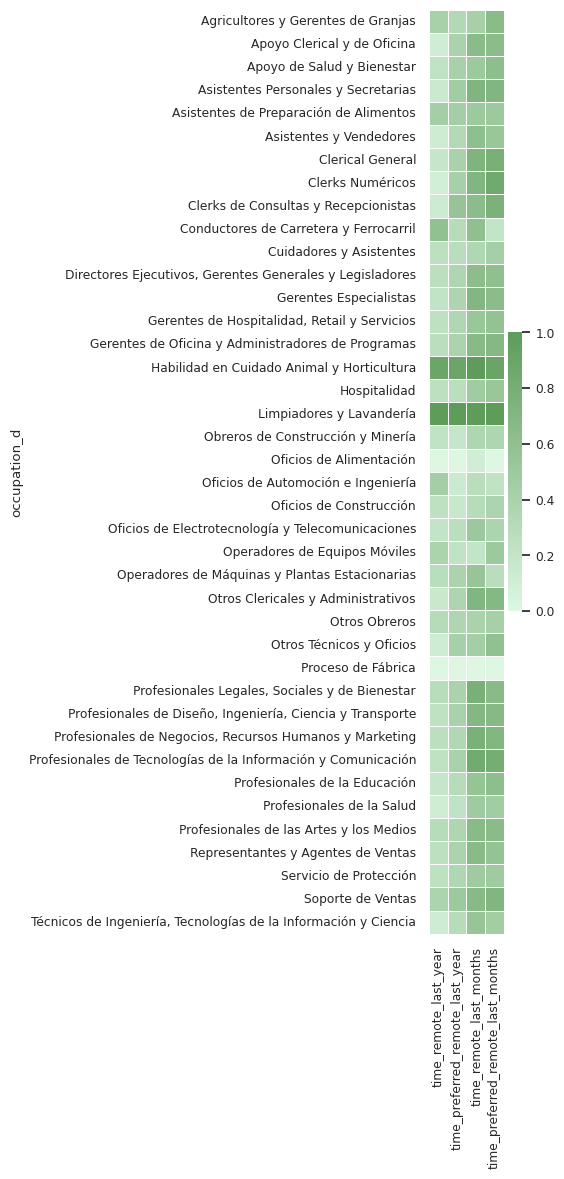

In [ ]:
head_map('occupation_d', ['time_remote_last_year',	'time_preferred_remote_last_year',
                          'time_remote_last_months',	'time_preferred_remote_last_months'], df20 )

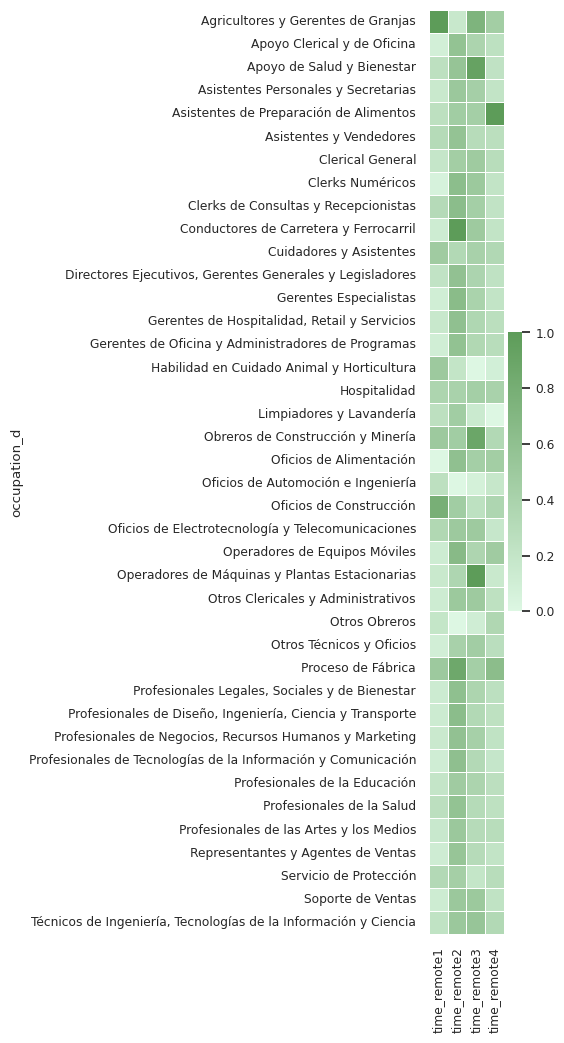

In [ ]:
head_map('occupation_d', ['time_remote1',	'time_remote2',	'time_remote3',	'time_remote4'], df20 )

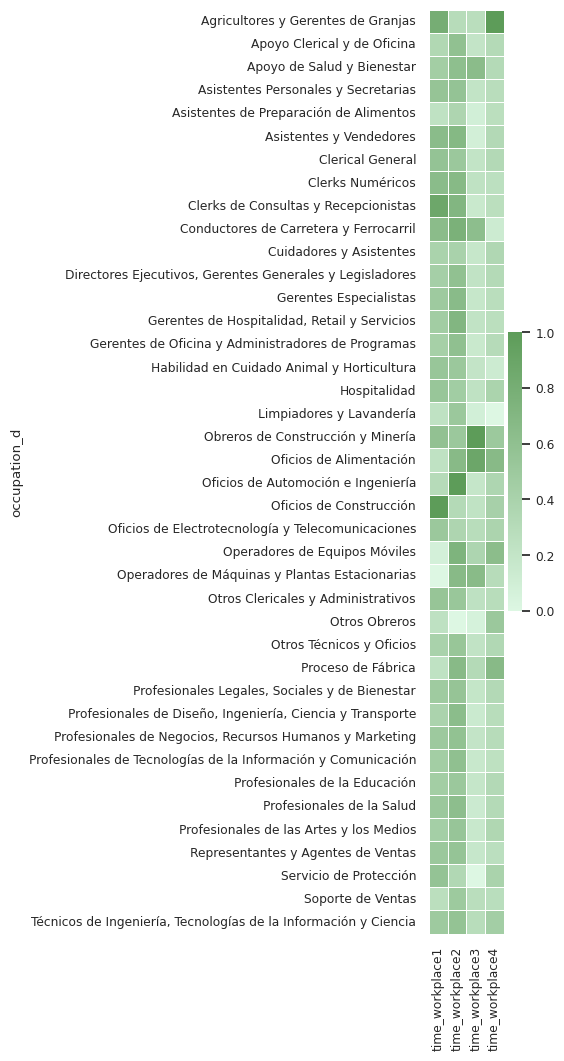

In [ ]:
head_map('occupation_d', ['time_workplace1',	'time_workplace2',	'time_workplace3',	'time_workplace4'], df20 )

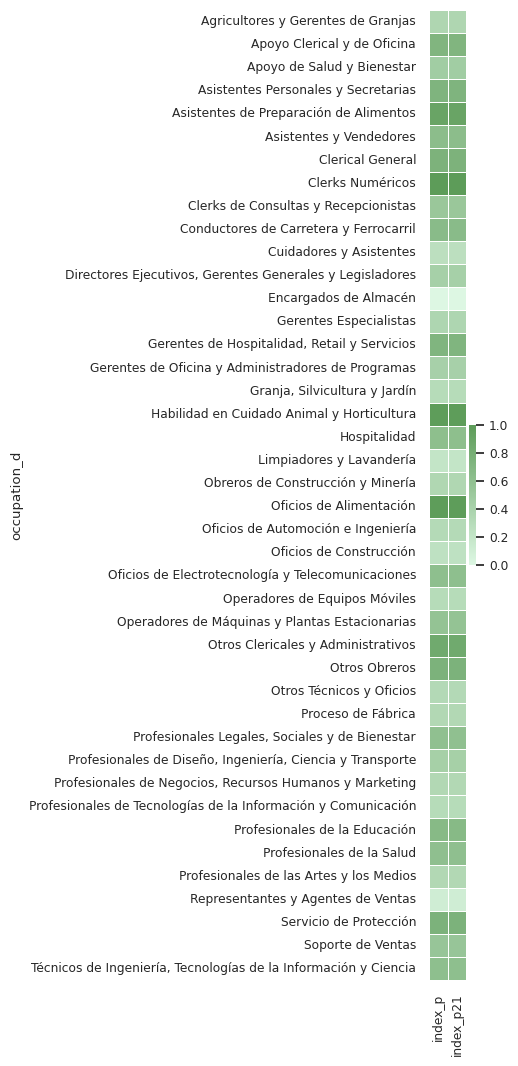

In [ ]:
head_map('occupation_d', ['index_p',	'index_p21'], df21 )

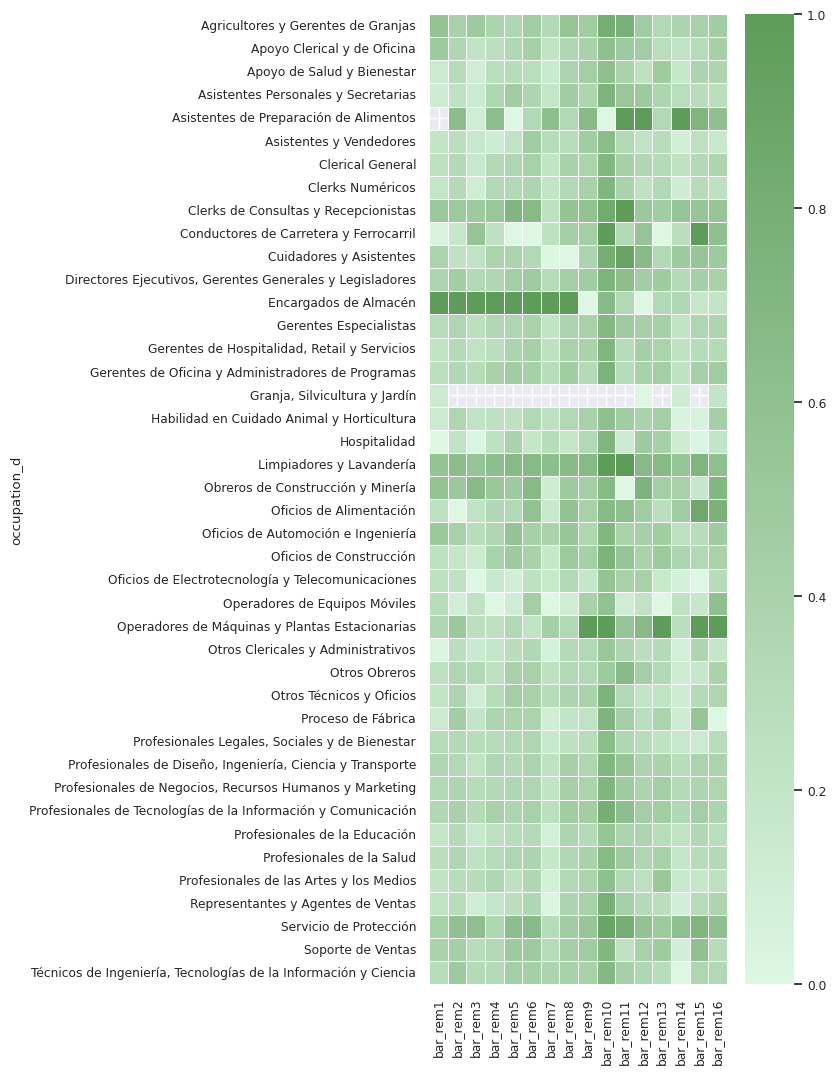

In [ ]:
head_map('occupation_d', ['bar_rem1',	'bar_rem2',	'bar_rem3',	'bar_rem4',	'bar_rem5',
                          'bar_rem6',	'bar_rem7',	'bar_rem8',	'bar_rem9',	'bar_rem10',
                          'bar_rem11',	'bar_rem12',	'bar_rem13',	'bar_rem14',
                          'bar_rem15',	'bar_rem16'], df21 )

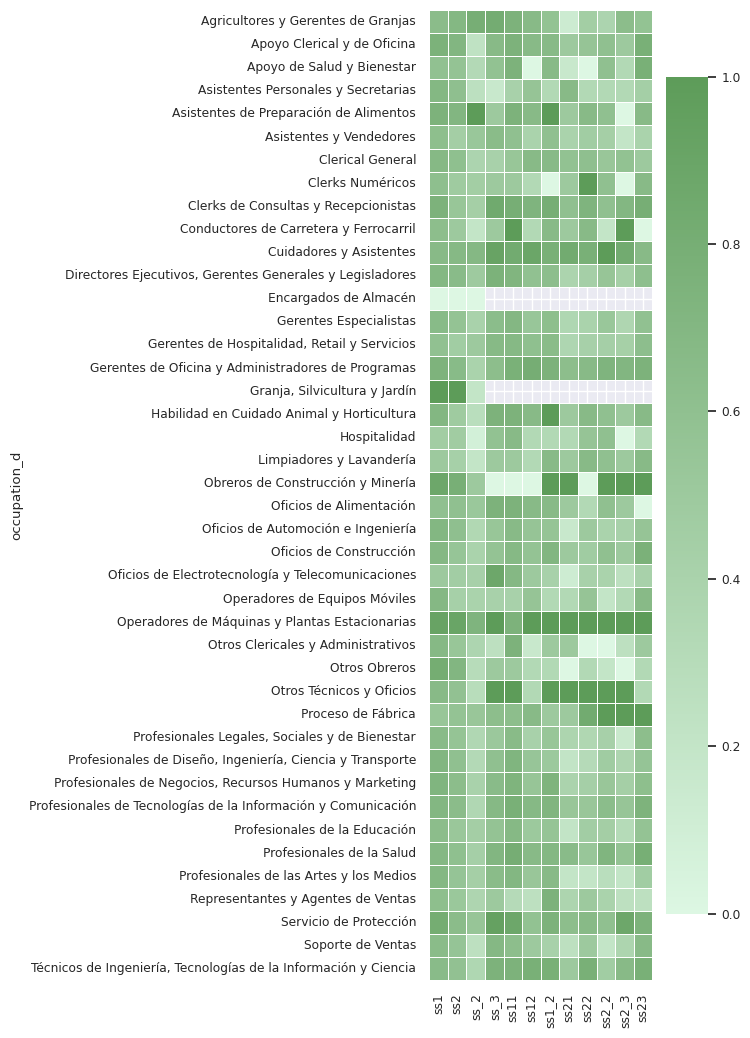

In [ ]:
head_map('occupation_d', ['ss1',	'ss2',	'ss_2',	'ss_3',	'ss11',	'ss12',	'ss1_2',
                          'ss21',	'ss22',	'ss2_2',	'ss2_3',	'ss23'], df21 )

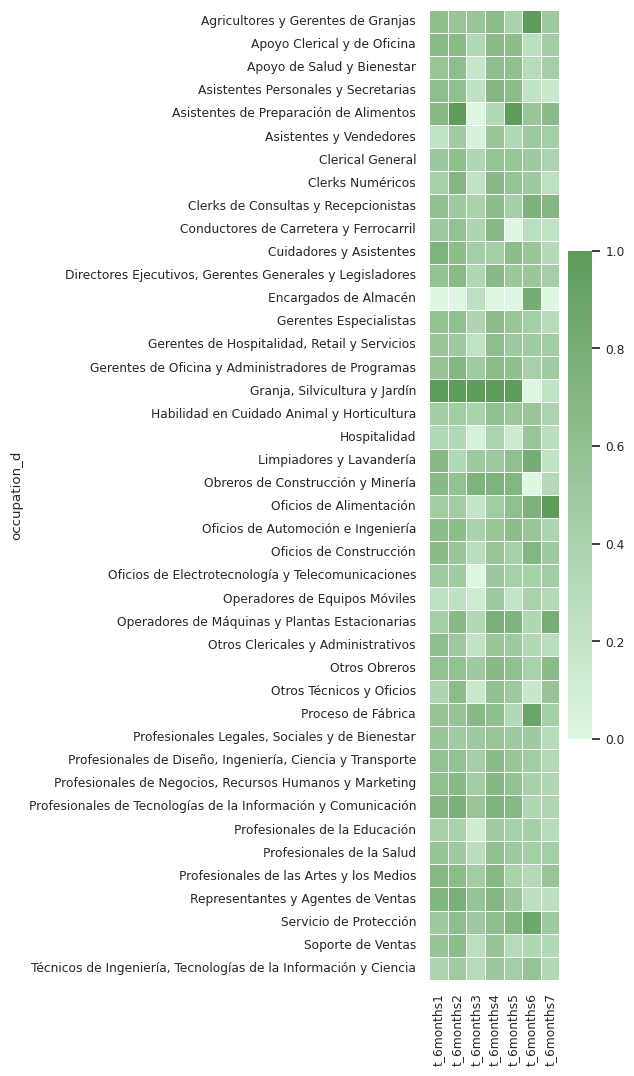

In [ ]:
head_map('occupation_d', ['t_6months1',	't_6months2',	't_6months3',	't_6months4',
't_6months5',	't_6months6',	't_6months7'], df21 )

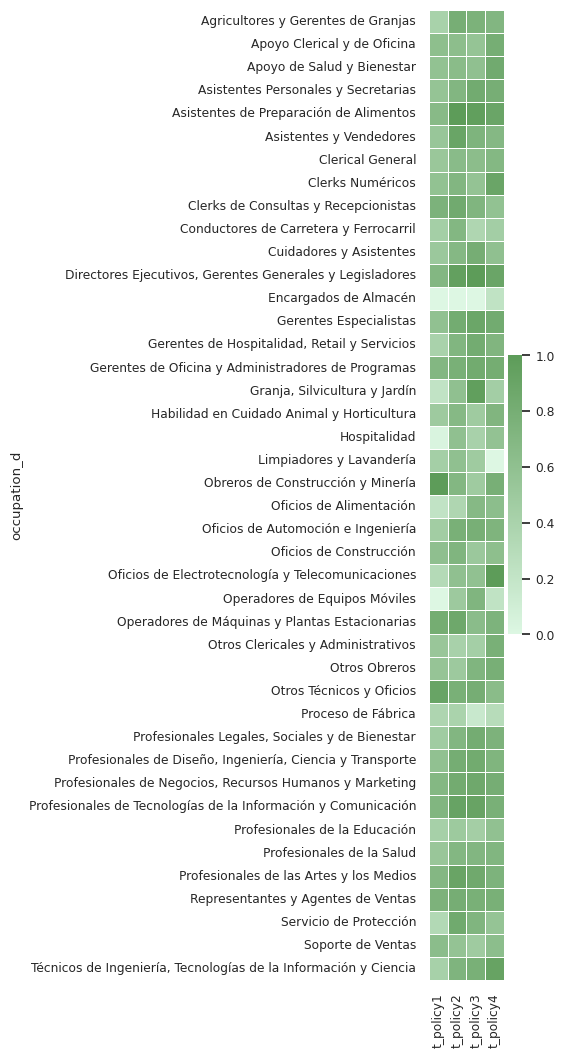

In [ ]:
head_map('occupation_d', ['t_policy1',	't_policy2',	't_policy3',	't_policy4'], df21 )

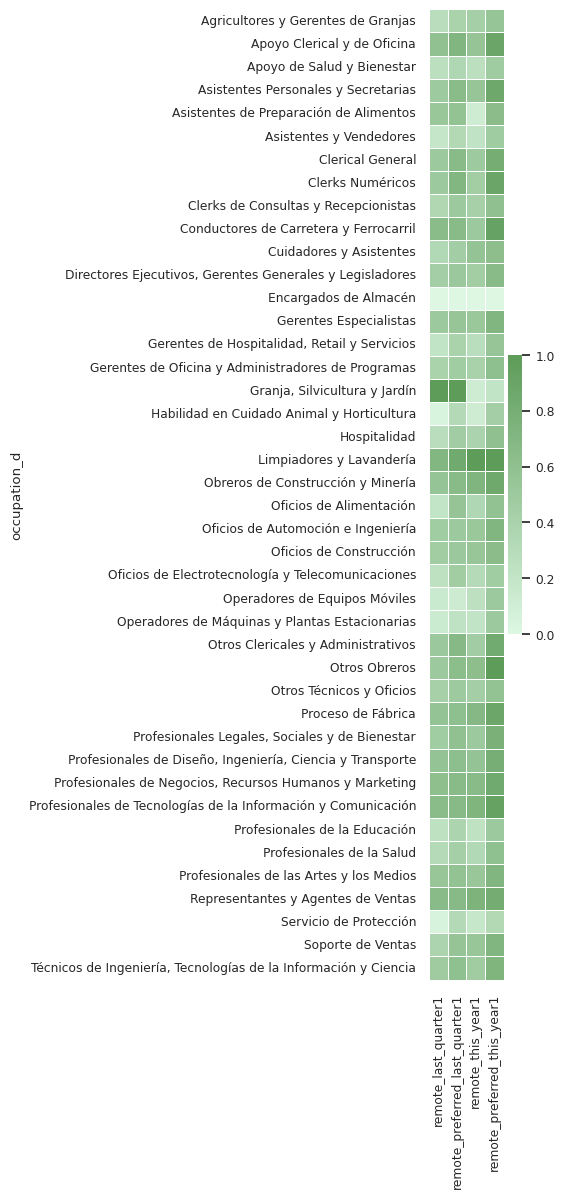

In [ ]:
head_map('occupation_d', ['remote_last_quarter1',	'remote_preferred_last_quarter1',
'remote_this_year1',	'remote_preferred_this_year1'], df21 )

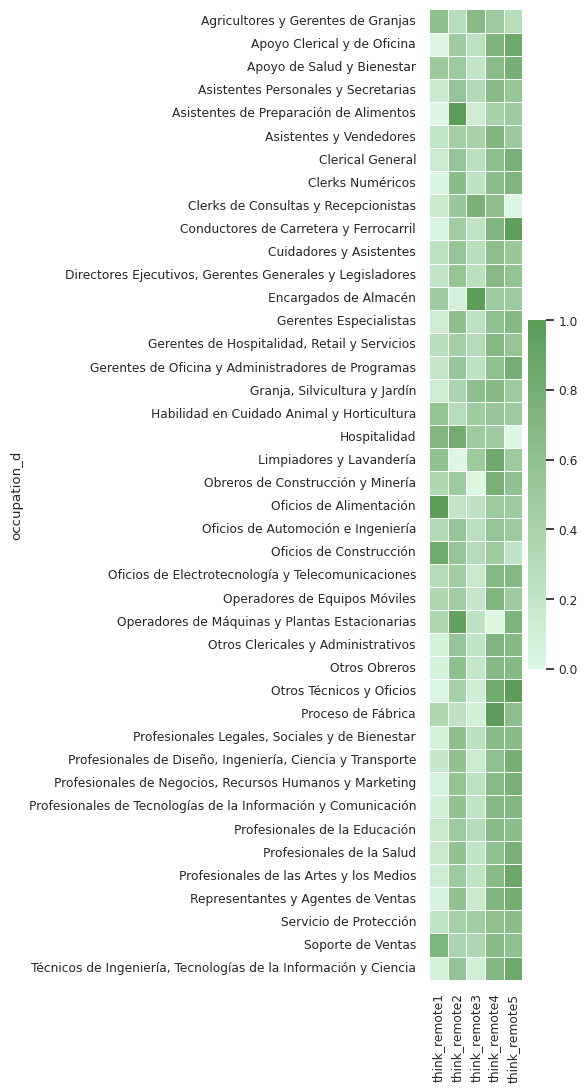

In [ ]:
head_map('occupation_d', ['think_remote1',	'think_remote2',	'think_remote3',
                          'think_remote4',	'think_remote5'], df21 )

### think_workplace

In [ ]:
think_workplace = ['think_workplace1',	'think_workplace2',
                   'think_workplace3',	'think_workplace4', 'think_workplace5']

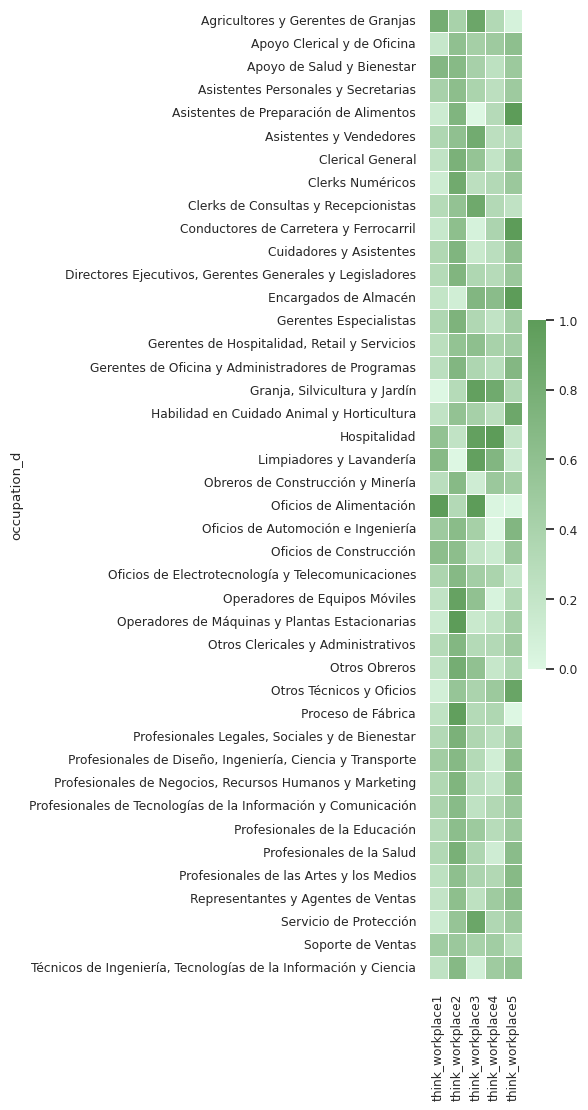

In [ ]:
head_map('occupation_d', think_workplace, df21 )

### barr

In [ ]:
g_bar =['bar_rem1',	'bar_rem2',	'bar_rem3',	'bar_rem4',	'bar_rem5',
      'bar_rem6',	'bar_rem7',	'bar_rem8',	'bar_rem9',	'bar_rem10',
      'bar_rem11',	'bar_rem12',	'bar_rem13',	'bar_rem14',	'bar_rem15',
      'bar_rem16']

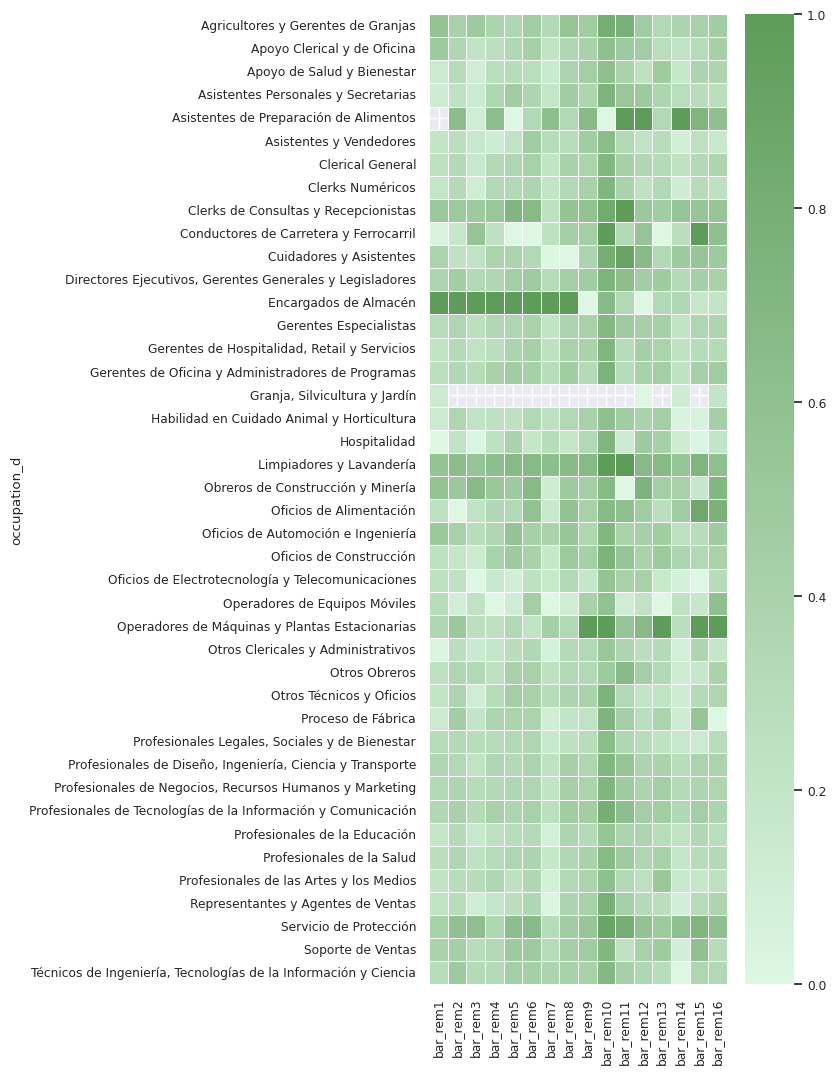

In [ ]:
head_map('occupation_d', g_bar, df21 )